Long-range genomic language models identify extensive chimera artifacts in Nanopore direct RNA sequencing
Figure 1A, schematic of LLM

Figure 1B, simulation (internal and terminal), CNN, CNN+transformer, HyenaDNA

Figure 1C, real data VCaP002/VCaP004, detected chimeric reads when applying Dorado and Deepchopper, validation of chimeric read by direct cDNA, (Bar plot, Dorado trim, Dorado w/o trim, Deepchopper), 

Explain the coverage difference between true events and artifacts, we expect true events have higher coverage than false positive events, at least in RNA004 and PromethION data.

Figure 1D, E, F: BLAT, quality and PolyA motif for false positive chimeric artifacts. (possible in supplementary)

Figure 1G: other platforms, such as ONT cDNA(direct or PCR), R2C2, CapTrap etc. Testing this using H1 and WTC11 from ENCODE. Test if other platforms have less chimeric artifacts predicted by DeepChopper and reduced artifact reads almost cannot be validated by other platforms.
(https://www.encodeproject.org/matrix/?type=Experiment&control_type!=*&assay_term_name=long+read+RNA-seq&status=released)

Figure 2: A,B,C 
distribution of false positives across chr, 

gene expression and size distribution for those with artifacts. 
Gene GO enrichment suggests Ribosome and ChrM genes are frequently involved.

~~Figure 1J, gene rescue, including the chrM genes.~~

Figure 2D, gene fusion due to chimeric artifacts, highlighted by IGV and current signals, for example open pore signal, adapter feature signals!
Figure 2E: Count the percentage of Deepchopper splitted reads accounting for original chimeric reads and unmapped reads. Count how many of the unmapped reads can be remapped after deepchopper split. 

Could the relative (and/or absolute) coverage increase of genes ranked by these ratios or counts?

Figure 1 Supplementary
Terminal adapter quality, soft-clipping mapping comparison


In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns
import json

In [3]:
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
from matplotlib import rcParams

# Set global font properties to Arial
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Arial",
        "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
        "ps.fonttype": 42,
        "text.usetex": False,
        "svg.fonttype": "none",
    }
)

rcParams.update(
    {
        "font.size": 24,  # Set a default font size
        "legend.fontsize": 16,
        "legend.handlelength": 2,
        "axes.linewidth": 2,
    }
)

plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20

In [5]:
# % colors
c1 = [i / 255 for i in (255, 200, 200)]
c2 = [i / 255 for i in (150, 220, 150)]
c3 = [i / 255 for i in (172, 188, 63)]

In [6]:
# https://mp.weixin.qq.com/s/7Q0bY7aj2Us6yOMy7ym6TA

d1 = "#BF1D2D"
d2 = "#262626"
d3 = "#293890"

In [7]:
e1 = "#2F2D54"
e2 = "#9193B4"
e3 = "#BD9AAD"
e4 = "#E8D2B3"

In [8]:
f1 = "#377eb8"
f2 = "#4daf4a"

In [9]:
g1 = "#b7bec8ff"
g2 = "#ff8080ff"

# F1B  Simulation Result 

In [10]:
# CNN 12 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9973070621490479     │
# │         test/loss         │   0.0006464940961450338   │
# │      test/precision       │    0.9969919919967651     │
# │        test/recall        │    0.9976223707199097     │
# └───────────────────────────┴───────────────────────────┘

# Hyena 120 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9930047988891602     │
# │         test/loss         │   0.0018698567291721702   │
# │      test/precision       │    0.9916011691093445     │
# │        test/recall        │    0.9944124817848206     │
# └───────────────────────────┴───────────────────────────┘

# CNN 120 0000
# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
# ┃        Test metric        ┃       DataLoader 0        ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
# │          test/f1          │    0.9906293749809265     │
# │         test/loss         │   0.0032503148540854454   │
# │      test/precision       │    0.9909157156944275     │
# │        test/recall        │    0.9903432130813599     │
# └───────────────────────────┴───────────────────────────┘


def simulation_plot(cl1, cl2, figsize=(6, 6), alpha=0.7, xlim=(0.8, 1), ylim=(0.8, 1)):
    cnn_name = "CNN"
    dc_name = "DeepChopper"

    data = {
        cnn_name: [0.9909157156944275, 0.9903432130813599],
        dc_name: [0.9916011691093445, 0.9944124817848206],
    }

    # Create a figure and axis
    _, ax = plt.subplots(figsize=figsize)

    # Define the F1 scores to plot
    f_scores = [0.2, 0.4, 0.6, 0.8, 0.9]

    # Initialize lists for lines and labels
    lines, labels = [], []

    # Plot F1 score iso-lines
    for f_score in f_scores:
        x = np.linspace(0.01, 1, 500)
        y = f_score * x / (2 * x - f_score)

        # Ensure y values are within [0, 1] range
        valid = (y >= 0) & (y <= 1)
        x = x[valid]
        y = y[valid]
        (l,) = plt.plot(x, y, color="gray", alpha=0.2, linewidth=3)

        # Add F1 score annotations
        plt.annotate(
            f"f1={f_score:0.1f}", xy=(0.9, f_score * 0.9 / (2 * 0.9 - f_score) + 0.02)
        )

    cnn_handle = plt.scatter(
        *data[cnn_name], c=cl1, s=120, label=cnn_name, alpha=alpha, edgecolors="none"
    )
    deepchopper_handle = plt.scatter(
        *data[dc_name], c=cl2, s=120, label=dc_name, alpha=alpha, edgecolors="none"
    )

    # # Add the scatter plots to handles
    handles = [cnn_handle, deepchopper_handle, l]
    labels = [cnn_name, dc_name, "Iso-f1 Curves"]
    plt.legend(handles=handles, labels=labels, loc="upper left")

    # Set the axis limits
    plt.xlim(xlim)
    plt.ylim(ylim)

    sns.despine(offset=10, trim=True)
    # Label the plot
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")

    plt.tight_layout()
    plt.savefig("simulation_pr.pdf", dpi=300)

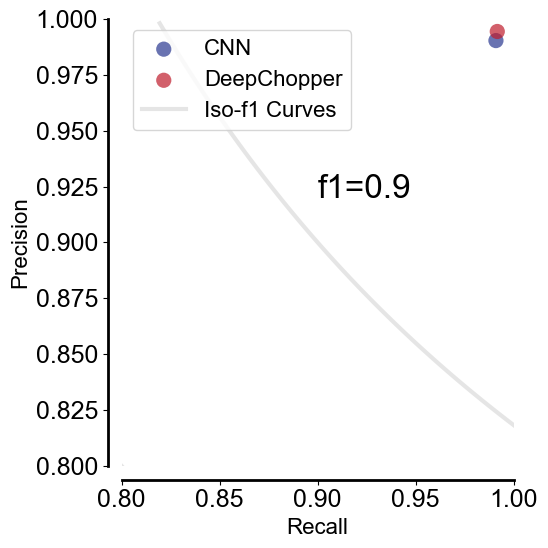

In [92]:
simulation_plot(d3, d1)

In [11]:
def simple_bar_for_acc(recall, percision, f1, file_name=None):
    # draw a bar plot for reacll, percision, and f1

    # Create a DataFrame for the metrics
    data = pd.DataFrame(
        {"Metric": ["Recall", "Precision", "F1"], "Value": [recall, percision, f1]}
    )

    # Set the style for the plot
    plt.figure(figsize=(8, 6))

    # Create the bar plot
    ax = sns.barplot(x="Metric", y="Value", data=data)

    # Customize the plot
    plt.xlabel("Metric")
    plt.ylabel("Value")

    # Add value labels on top of each bar
    for i, v in enumerate(data["Value"]):
        ax.text(i, v, f"{v:.3f}", ha="center", va="bottom", fontsize=10)

    # Set y-axis limit from 0 to 1
    plt.ylim(0, 1)

    sns.despine(offset=10, trim=True)

    plt.tight_layout()
    if file_name is None:
        plt.savefig("simulation_bar_hyena.pdf", dpi=300)

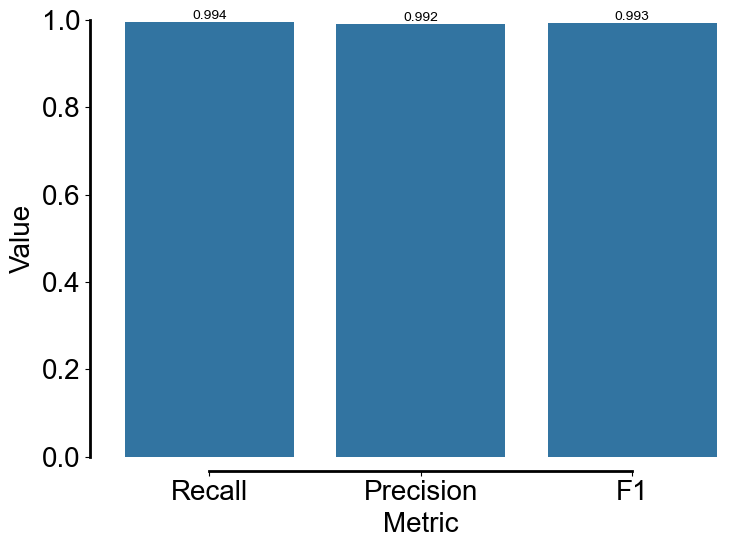

In [12]:
#  test/f1          │    0.9930047988891602     │
# # │         test/loss         │   0.0018698567291721702   │
# # │      test/precision       │    0.9916011691093445     │
# # │        test/recall        │    0.9944124817848206     │

simple_bar_for_acc(
    recall=0.9944124817848206, percision=0.9916011691093445, f1=0.9930047988891602
)


In [34]:
def float_accuracy_plot(recall, precision, f1, file_name=None, figsize=(8, 6)):
    # Create a DataFrame for the metrics
    data = pd.DataFrame(
        {"Metric": ["Recall", "Precision", "F1"], "Value": [recall, precision, f1]}
    )

    # Set the style for the plot
    plt.figure(figsize=figsize)

    # Create the lollipop plot
    ax = sns.pointplot(x="Metric", y="Value", data=data, linestyle="none", color="navy")

    # Add vertical lines
    for i in range(len(data)):
        plt.vlines(
            x=i, ymin=0.99, ymax=data["Value"][i], color="navy", alpha=0.7, linewidth=2
        )

    # Customize the plot
    # plt.title('Accuracy Metrics Comparison', fontsize=18)
    plt.xlabel("", fontsize=14)
    plt.ylabel("Value")

    # Set y-axis to start from 0.99 for better visibility of differences
    y_min = max(0.99, min(data["Value"]) - 0.001)
    y_max = min(1.00, max(data["Value"]) + 0.001)
    plt.ylim(y_min, y_max)

    # Format y-axis ticks
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.4f}"))

    # Add value labels
    for i, v in enumerate(data["Value"]):
        plt.text(i, v + 0.0002, f"{v:.3f}", ha="center", va="bottom", fontsize=14)

    # Add a light horizontal line at y=1 for reference
    plt.axhline(y=1, color="gray", linestyle="--", alpha=0.5)

    # Remove top and right spines
    sns.despine(offset=10, trim=True)

    # Adjust layout
    plt.tight_layout()

    if file_name is None:
        plt.savefig("simulation_bar_hyena.pdf", dpi=300)

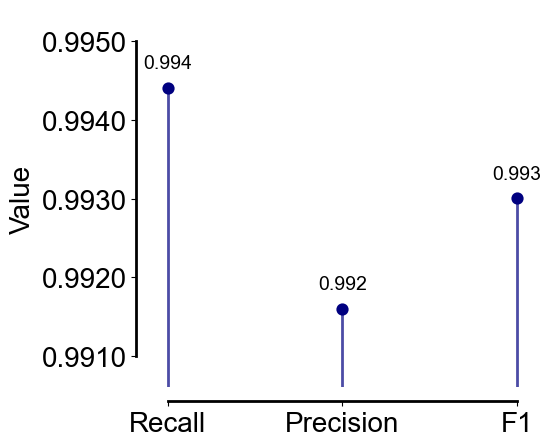

In [37]:
float_accuracy_plot(
    recall=0.9944124817848206,
    precision=0.9916011691093445,
    f1=0.9930047988891602,
    figsize=(6, 5),
)

# F1C Bar PLot for Chemeric Read compare

In [10]:
type_names = ["Dorado with Trim", "Dorado w/o Trim", "DC"]

vcap002_data = {
    type_names[0]: [107266, 6228],
    type_names[1]: [107304, 6228],
    type_names[2]: [9844, 4664],
}

vcap004_data = {
    type_names[0]: [29144, 7165],
    type_names[1]: [29542, 7119],
    type_names[2]: [23045, 7027],
}


def prepare_data(data):
    data_with_validated = {
        "value": list(
            chain.from_iterable(
                [[data[t][0] - data[t][1], data[t][1]] for t in type_names]
            )
        ),
        "data type": list(chain.from_iterable([[i] * 2 for i in type_names])),
        "type": ["Unvalidated", "Validated"] * len(type_names),
    }
    data_df = pd.DataFrame(data_with_validated)
    return data_df

In [11]:
data_df = prepare_data(vcap002_data)
vcap004_data_df = prepare_data(vcap004_data)
# wtc11_data_df = prepare_data(wtc11_data)

In [12]:
data_df

,value,data type,type
0,101038,Dorado with Trim,Unvalidated
1,6228,Dorado with Trim,Validated
2,101076,Dorado w/o Trim,Unvalidated
3,6228,Dorado w/o Trim,Validated
4,5180,DC,Unvalidated
5,4664,DC,Validated


Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Data  Type')

Text(0.5, 0, 'Data  Type')

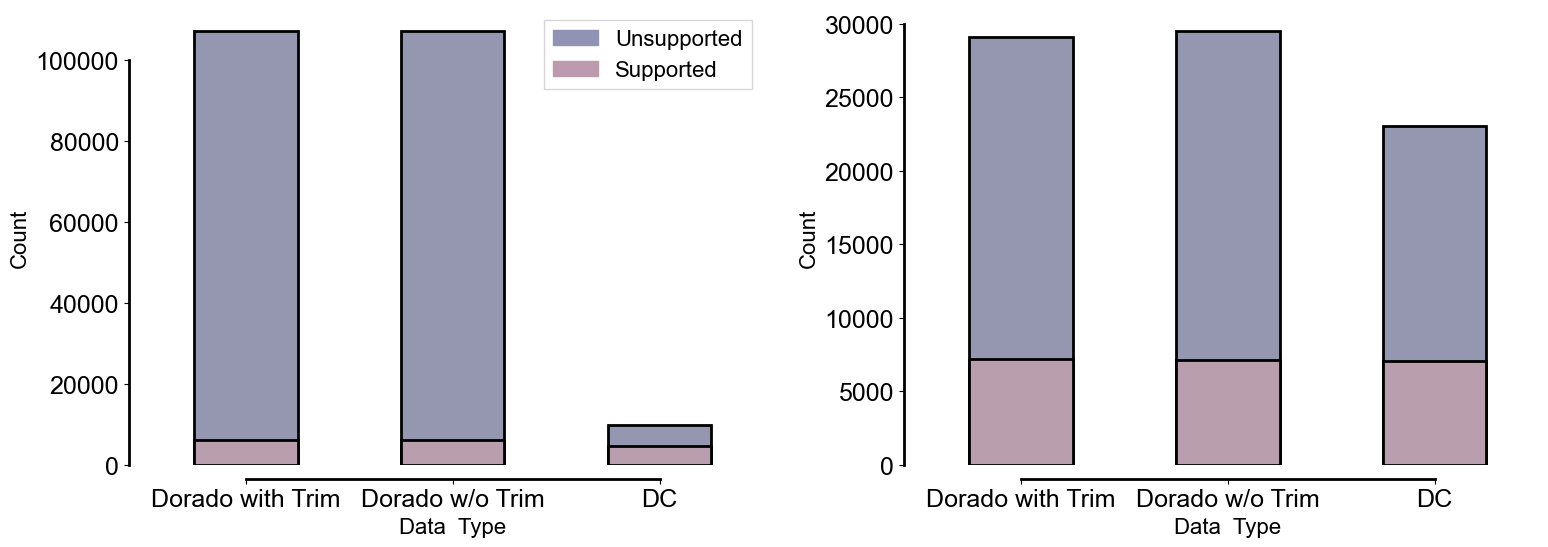

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
axs = axs.flatten()

bar_width = 0.5

bar1 = sns.barplot(
    data=data_df.groupby("data type")["value"].sum().reset_index(),
    x="data type",
    y="value",
    order=type_names,
    color=e2,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[0],
)
bar2 = sns.barplot(
    data=data_df.query("type == 'Validated'"),
    x="data type",
    y="value",
    order=type_names,
    estimator=sum,
    color=e3,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[0],
)


bar3 = sns.barplot(
    data=vcap004_data_df.groupby("data type")["value"].sum().reset_index(),
    x="data type",
    y="value",
    order=type_names,
    color=e2,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[1],
)
bar4 = sns.barplot(
    data=vcap004_data_df.query("type == 'Validated'"),
    x="data type",
    y="value",
    order=type_names,
    estimator=sum,
    color=e3,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs[1],
)


# add legend
top_bar = mpatches.Patch(color=e2, label="Unsupported")
bottom_bar = mpatches.Patch(color=e3, label="Supported")
axs[0].legend(handles=[top_bar, bottom_bar], fancybox=False)

sns.despine(offset=10, trim=True)

axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")

axs[0].set_xlabel("Data  Type")
axs[1].set_xlabel("Data  Type")

plt.tight_layout()
plt.savefig("bar_plot_chemeric_read_cmp.pdf", dpi=300)

,value,data type,type
0,101038,Dorado with Trim,Unvalidated
1,6228,Dorado with Trim,Validated
2,101076,Dorado w/o Trim,Unvalidated
3,6228,Dorado w/o Trim,Validated
4,5180,DC,Unvalidated
5,4664,DC,Validated
6,4912,Dorado with Trim + DC,Unvalidated
7,4666,Dorado with Trim + DC,Validated


Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Data  Type')

Text(0.5, 0, 'Data  Type')

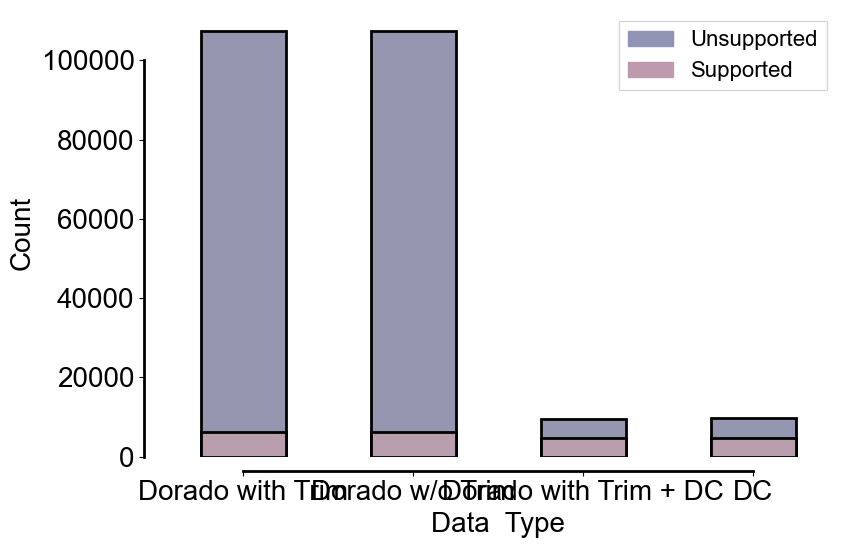

In [23]:
## plot for  appeal letter

#  4666/9578
# 9578 - 4666 = 4912

# add two row
# 4912 Dorado with Trim + DC Unvalidated
# 4666 Dorado with Trim + DC Validated

# Use pandas concat instead of append (which is deprecated)
data_df_appeal = pd.concat(
    [
        data_df,
        pd.DataFrame(
            {
                "value": [4912, 4666],
                "data type": ["Dorado with Trim + DC", "Dorado with Trim + DC"],
                "type": ["Unvalidated", "Validated"],
            }
        ),
    ],
    ignore_index=True,
)

appeal_type_names = [
    "Dorado with Trim",
    "Dorado w/o Trim",
    "Dorado with Trim + DC",
    "DC",
]


# Display the updated dataframe
data_df_appeal

fig, axs = plt.subplots(1, 1, figsize=(9, 6), sharey=False)
bar_width = 0.5

bar1 = sns.barplot(
    data=data_df_appeal.groupby("data type")["value"].sum().reset_index(),
    x="data type",
    y="value",
    order=appeal_type_names,
    color=e2,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs,
)

bar2 = sns.barplot(
    data=data_df_appeal.query("type == 'Validated'"),
    x="data type",
    y="value",
    order=appeal_type_names,
    estimator=sum,
    color=e3,
    edgecolor="k",
    linewidth=2,
    width=bar_width,
    ax=axs,
)


# add legend
top_bar = mpatches.Patch(color=e2, label="Unsupported")
bottom_bar = mpatches.Patch(color=e3, label="Supported")
axs.legend(handles=[top_bar, bottom_bar], fancybox=False)

sns.despine(offset=10, trim=True)

axs.set_ylabel("Count")
axs.set_ylabel("Count")

axs.set_xlabel("Data  Type")
axs.set_xlabel("Data  Type")

plt.tight_layout()
plt.savefig("appeal_letter_bar_plot_chemeric_read_cmp.pdf", dpi=300)

In [28]:
# wtc11  and other platform  plot

type_names_other_platform = ["Dorado with Trim", "DC"]

vcap_002_event_data = {
    type_names_other_platform[0]: [107266, 6228],
    type_names_other_platform[1]: [9844, 4664],
}
vcap_004_event_data = {
    type_names_other_platform[0]: [10708, 2917],
    type_names_other_platform[1]: [5028, 1858],
}


wtc11_data = {
    "ONT PCR cDNA": {
        type_names_other_platform[0]: [12987, 4765],
        type_names_other_platform[1]: [5903, 3904],
    },
    "ONT CapTrap": {
        type_names_other_platform[0]: [12987, 3972],
        type_names_other_platform[1]: [5903, 3343],
    },
    "ONT R2C2": {
        type_names_other_platform[0]: [12987, 4023],
        type_names_other_platform[1]: [5903, 3913],
    },
    "PB cDNA": {
        type_names_other_platform[0]: [12987, 3970],
        type_names_other_platform[1]: [5903, 3873],
    },
    "PB CapTrap": {
        type_names_other_platform[0]: [12987, 3410],
        type_names_other_platform[1]: [5903, 3027],
    },
}

mouse_data = {
    "ONT PCR cDNA": {
        type_names_other_platform[0]: [27360, 2785],
        type_names_other_platform[1]: [5922, 2189],
    },
    "ONT CapTrap": {
        type_names_other_platform[0]: [27360, 9429],
        type_names_other_platform[1]: [5922, 2643],
    },
    "ONT R2C2": {
        type_names_other_platform[0]: [27360, 2064],
        type_names_other_platform[1]: [5922, 1956],
    },
    "PB cDNA": {
        type_names_other_platform[0]: [27360, 2264],
        type_names_other_platform[1]: [5922, 2203],
    },
    "PB CapTrap": {
        type_names_other_platform[0]: [27360, 1997],
        type_names_other_platform[1]: [5922, 1423],
    },
}

# support rate
# ONT PCR cDNA:do sp 36.69%
# ONT PCR cDNA:dc sp 66.14%
# ONT CapTrap:do sp 30.58%
# ONT CapTrap:dc sp 56.63%
# ONT R2C2:do sp 30.98%
# ONT R2C2:dc sp 66.29%
# PB cDNA:do sp 30.57%
# PB cDNA:dc sp 65.61%
# PB CapTrap:do sp 26.26%
# PB CapTrap:dc sp 51.28%


def prepare_data_other_platform(data, type_names):
    data_with_validated = {
        "value": list(
            chain.from_iterable(
                [[data[t][0] - data[t][1], data[t][1]] for t in type_names]
            )
        ),
        "data type": list(chain.from_iterable([[i] * 2 for i in type_names])),
        "type": ["Unvalidated", "Validated"] * len(type_names),
    }
    data_df = pd.DataFrame(data_with_validated)
    return data_df


def plot_other_platform(data, type_names, figsize=(20, 10), figname=None):
    fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=False)
    axs = axs.flatten()
    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=e2, label="Unsupported")
    bottom_bar = mpatches.Patch(color=e3, label="Supported")

    ax_id = 0
    for dtype, values in data.items():
        ax = axs[ax_id]
        dtype_df = prepare_data_other_platform(values, type_names)

        bar1 = sns.barplot(
            data=dtype_df.groupby("data type")["value"].sum().reset_index(),
            x="data type",
            y="value",
            order=type_names,
            color=e2,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        bar2 = sns.barplot(
            data=dtype_df.query("type == 'Validated'"),
            x="data type",
            y="value",
            order=type_names,
            estimator=sum,
            color=e3,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

        ax.set_ylabel("Count")
        ax.set_xlabel("Data  Type")
        ax.set_title(dtype)

        ax_id += 1

    # remove last axis
    axs[-1].axis("off")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    if figname:
        plt.savefig(figname, dpi=300)

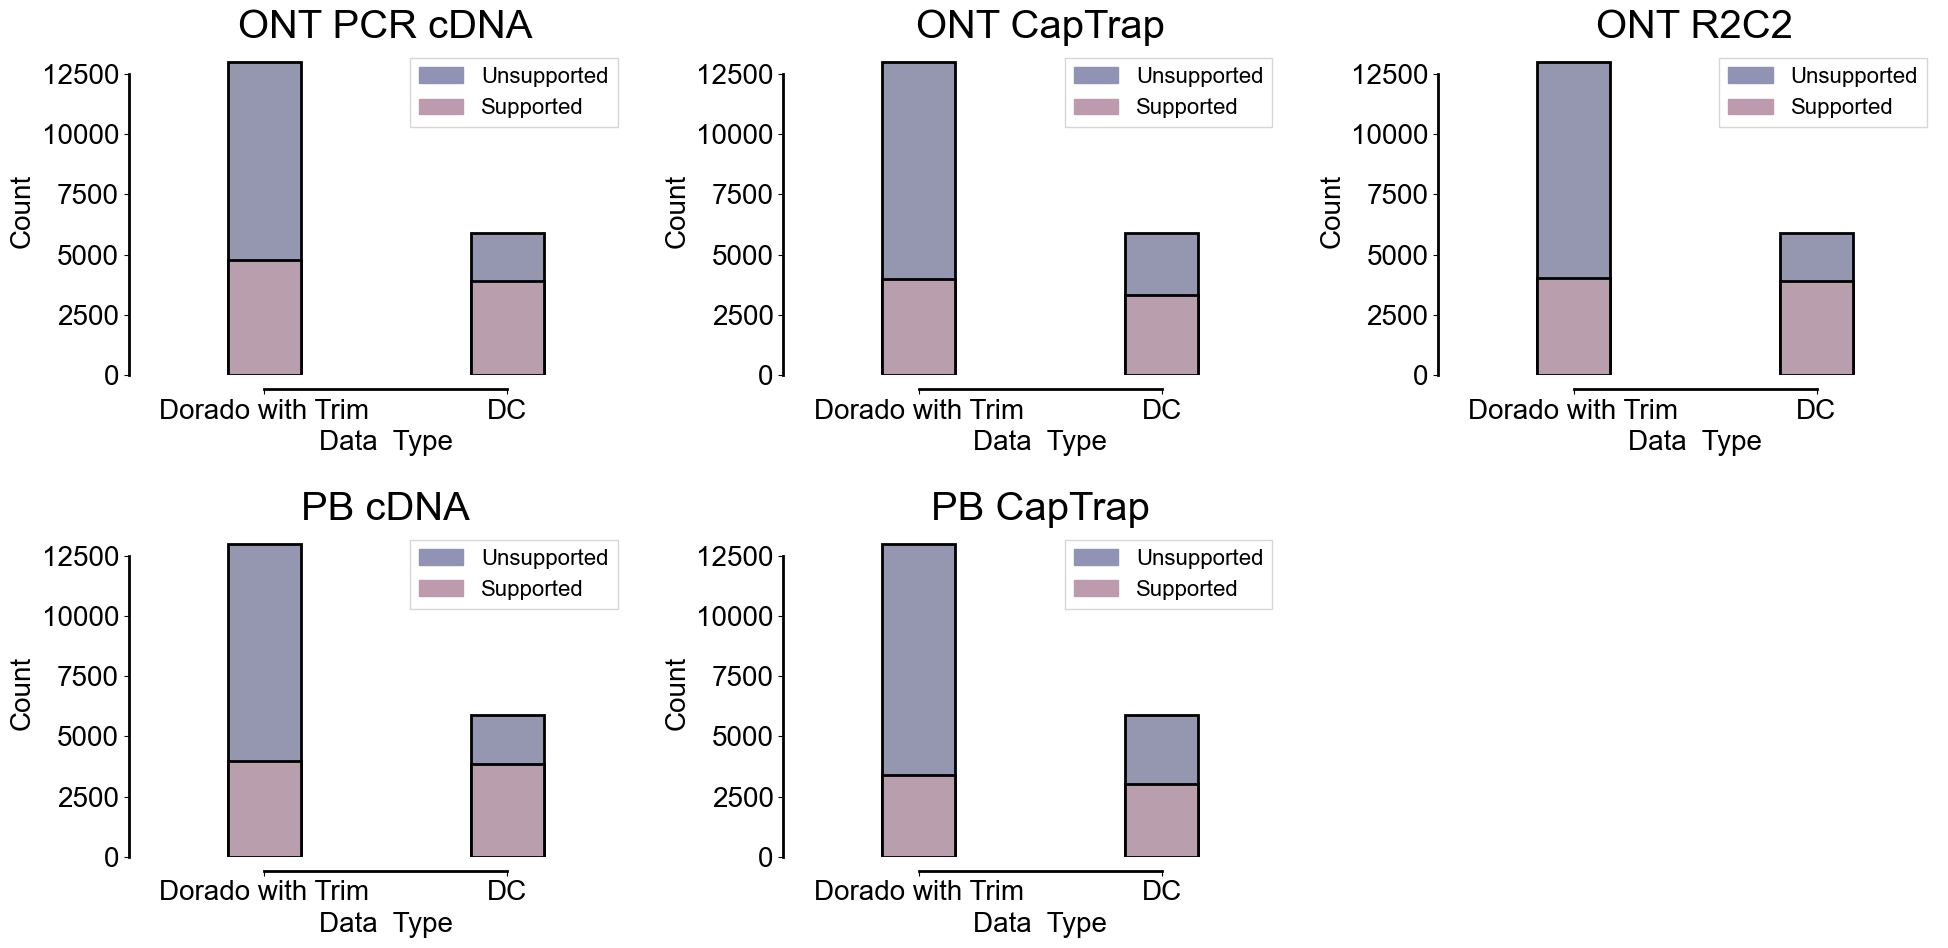

In [27]:
plot_other_platform(
    wtc11_data,
    type_names_other_platform,
    figname="wtc11_bar_plot_chemeric_read_cmp_2.pdf",
)

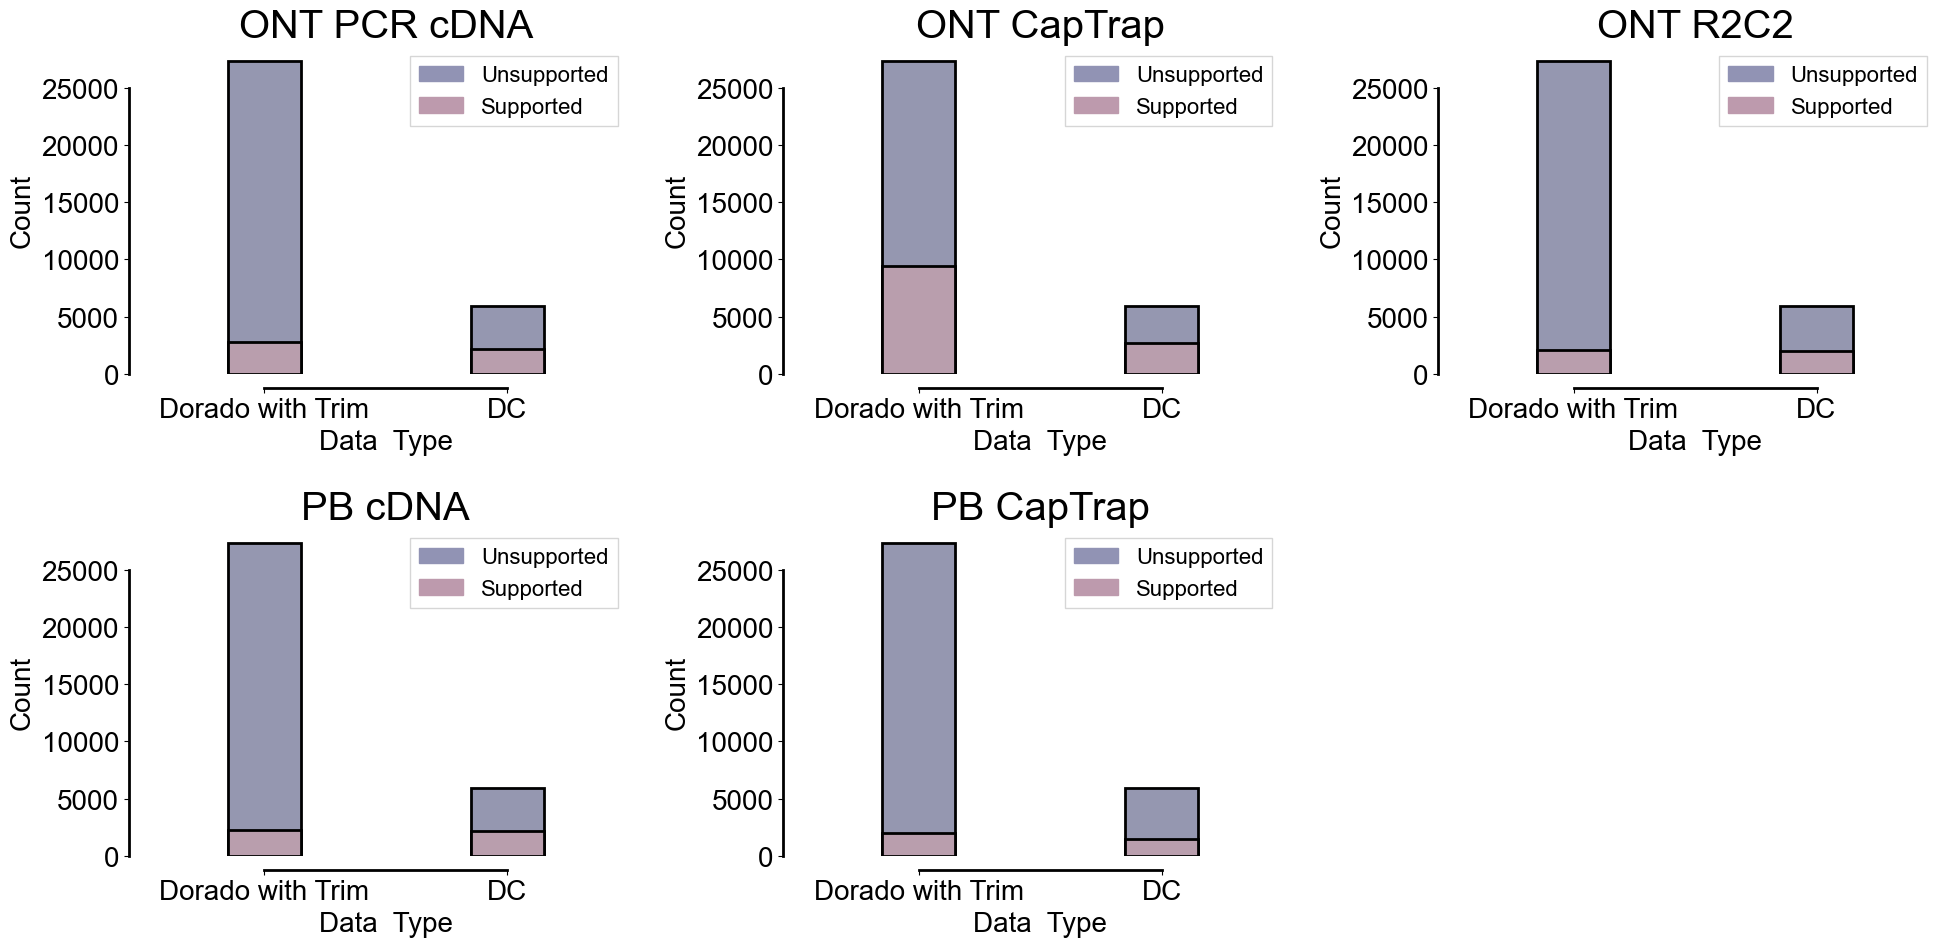

In [11]:
plot_other_platform(
    mouse_data,
    type_names_other_platform,
    figname="mouse_bar_plot_chemeric_read_cmp_2.pdf",
)


In [20]:
# chimerica,A549,HCT116,HepG2,K562,MCF7
# dorado,"12,803","46,800","16,921","23,214","17,646"
# deepchopper,"2,365","9,527","2,726","4,252","6,700"
# Direct cDNA raw,"124,970","877,889","157,016","181,361","226,681"
# Support DC,"1,029","5,330","1,402","1,867","3,171"
# Support dorado,"1,112","7,147","1,540","2,109","3,369"

# In total compare to dc
# A549: 81.53%
# HCT116: 79.64%
# HepG2: 83.89%
# K562: 81.68%
# MCF7: 62.03%

# Supporting rate
# A549:do sp 8.69%
# A549:dc sp 43.51%
# HCT116:do sp 15.27%
# HCT116:dc sp 55.95%
# HepG2:do sp 9.10%
# HepG2:dc sp 51.43%
# K562:do sp 9.09%
# K562:dc sp 43.91%
# MCF7:do sp 19.09%
# MCF7:dc sp 47.33%


sigpore_data = {
    "A549": {
        type_names_other_platform[0]: [12803, 1112],
        type_names_other_platform[1]: [2365, 1029],
    },
    "HCT116": {
        type_names_other_platform[0]: [46800, 7147],
        type_names_other_platform[1]: [9527, 5330],
    },
    "HepG2": {
        type_names_other_platform[0]: [16921, 1540],
        type_names_other_platform[1]: [2726, 1402],
    },
    "K562": {
        type_names_other_platform[0]: [23214, 2109],
        type_names_other_platform[1]: [4252, 1867],
    },
    "MCF7": {
        type_names_other_platform[0]: [17646, 3369],
        type_names_other_platform[1]: [6700, 3171],
    },
}


def plot_sigpore_platform(data, type_names, figsize=(20, 10), figname=None):
    fig, axs = plt.subplots(2, 3, figsize=figsize, sharey=False)
    axs = axs.flatten()
    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=e2, label="Unsupported")
    bottom_bar = mpatches.Patch(color=e3, label="Supported")

    ax_id = 0
    for dtype, values in data.items():
        ax = axs[ax_id]
        dtype_df = prepare_data_other_platform(values, type_names)

        bar1 = sns.barplot(
            data=dtype_df.groupby("data type")["value"].sum().reset_index(),
            x="data type",
            y="value",
            order=type_names,
            color=e2,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        bar2 = sns.barplot(
            data=dtype_df.query("type == 'Validated'"),
            x="data type",
            y="value",
            order=type_names,
            estimator=sum,
            color=e3,
            edgecolor="k",
            linewidth=2,
            width=bar_width,
            ax=ax,
        )
        ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

        ax.set_ylabel("Count")
        ax.set_xlabel("Data  Type")
        ax.set_title(dtype)

        ax_id += 1

    # remove last axis
    axs[-1].axis("off")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if figname:
        plt.savefig(figname, dpi=300)


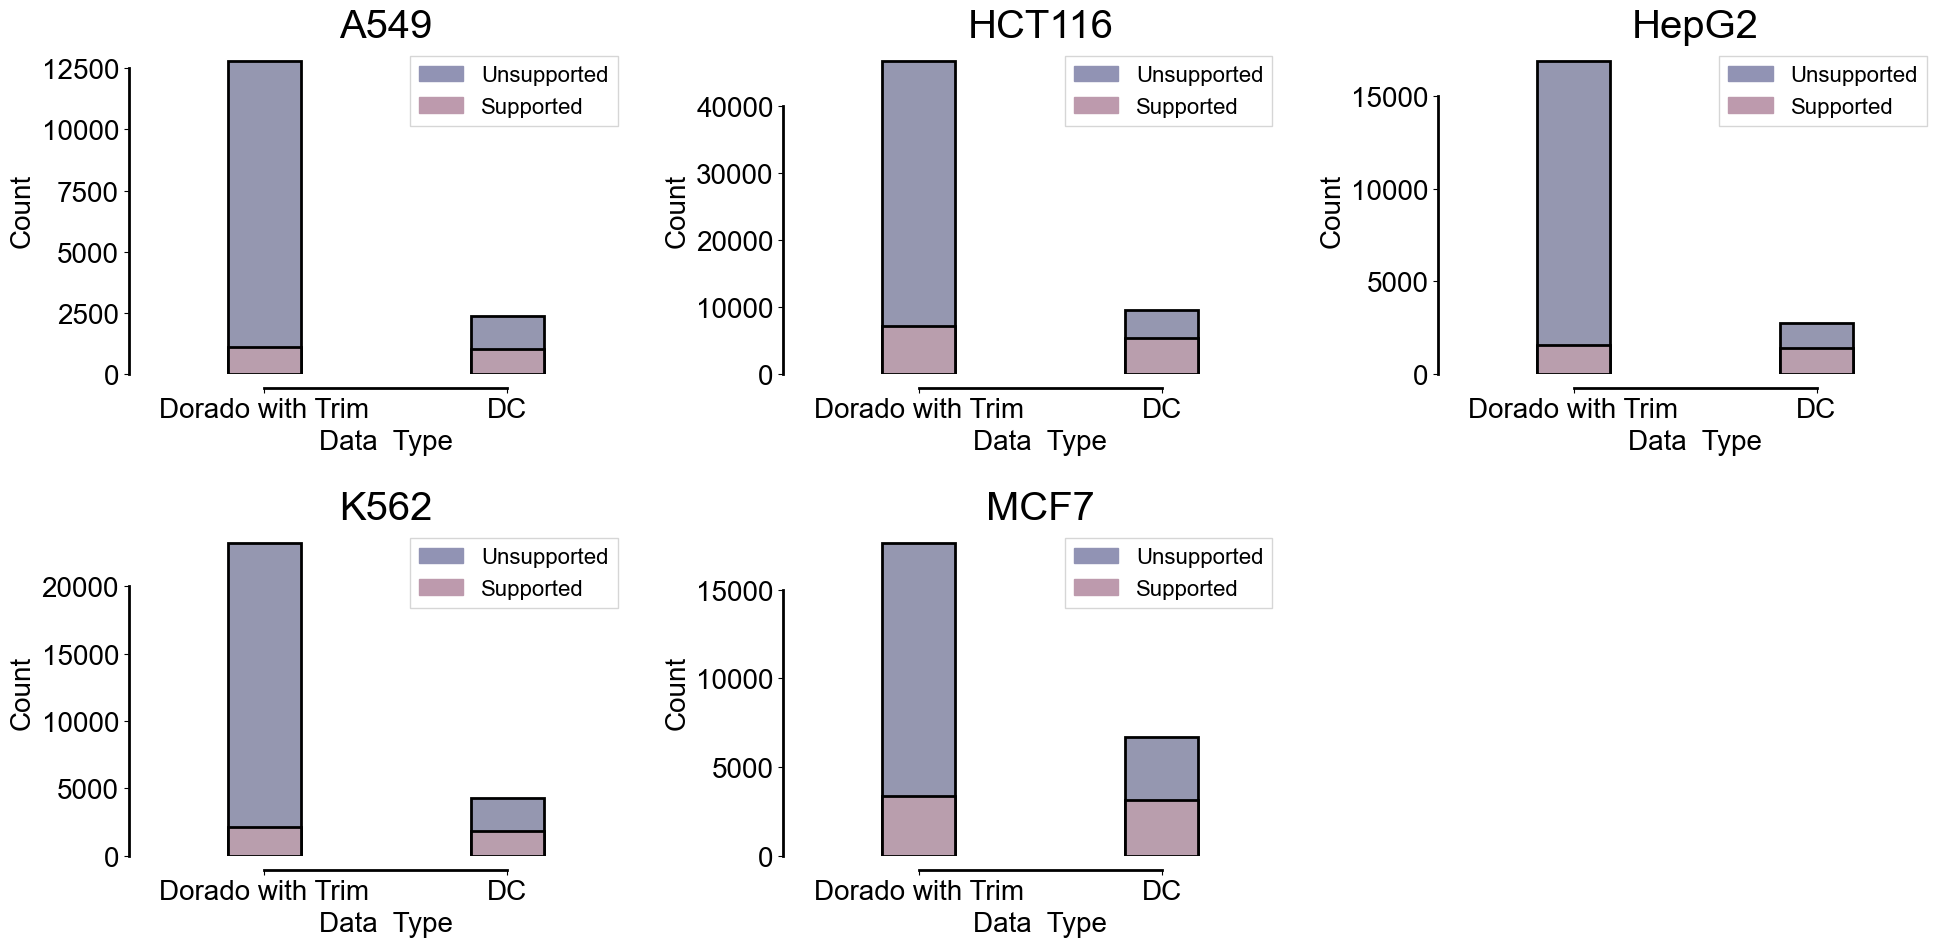

In [23]:
plot_sigpore_platform(
    sigpore_data,
    type_names_other_platform,
    figname="sigpore_bar_plot_chemeric_read_cmp.pdf",
)

# F1 Bar Plot for Chimeric Read Group Event

In [11]:
def plot_event(
    data,
    type_names,
    figsize=(8, 6),
    color1=e2,
    color2=e3,
    figname="group_chimeric_bar_plot.pdf",
):
    fig, ax = plt.subplots(figsize=figsize)

    dtype_df = prepare_data_other_platform(data, type_names)

    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=color1, label="Unsupported")
    bottom_bar = mpatches.Patch(color=color2, label="Supported")

    bar1 = sns.barplot(
        data=dtype_df.groupby("data type")["value"].sum().reset_index(),
        x="data type",
        y="value",
        order=type_names,
        color=color1,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
        ax=ax,
    )
    bar2 = sns.barplot(
        data=dtype_df.query("type == 'Validated'"),
        x="data type",
        y="value",
        order=type_names,
        estimator=sum,
        color=color2,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
        ax=ax,
    )
    ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

    ax.set_ylabel("Count")
    ax.set_xlabel("Data  Type")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

In [12]:
type_names_other_platform = ["Dorado with Trim", "DC"]

vcap_002_event_data = {
    type_names_other_platform[0]: [79015, 5740],
    type_names_other_platform[1]: [4947, 2509],
}

vcap_004_event_data = {
    type_names_other_platform[0]: [10708, 2917],
    type_names_other_platform[1]: [5028, 1858],
}

# gene fusion of vcap 002 with cdna support
vcap_002_gene_fusion = {
    type_names_other_platform[0]: [555, 17],
    type_names_other_platform[1]: [60, 20],
}

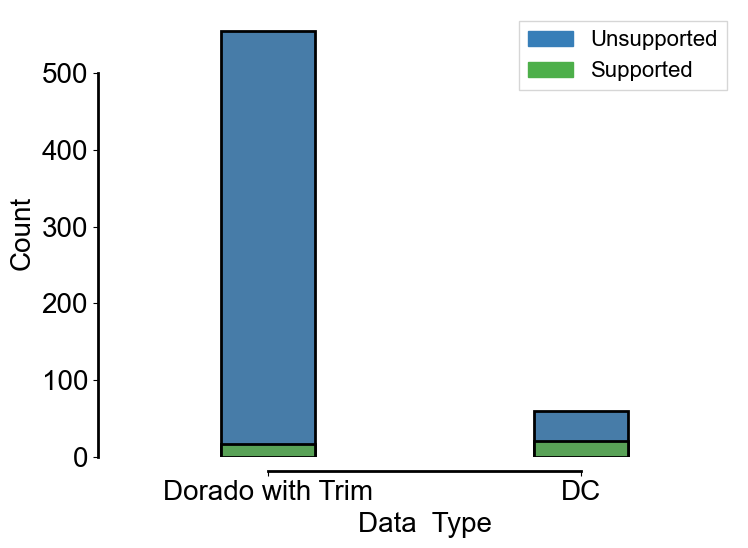

In [15]:
plot_event(
    vcap_002_gene_fusion,
    type_names_other_platform,
    color1=f1,
    color2=f2,
    figname="vcap002_gene_fusion_with_cdna_plot.pdf",
)

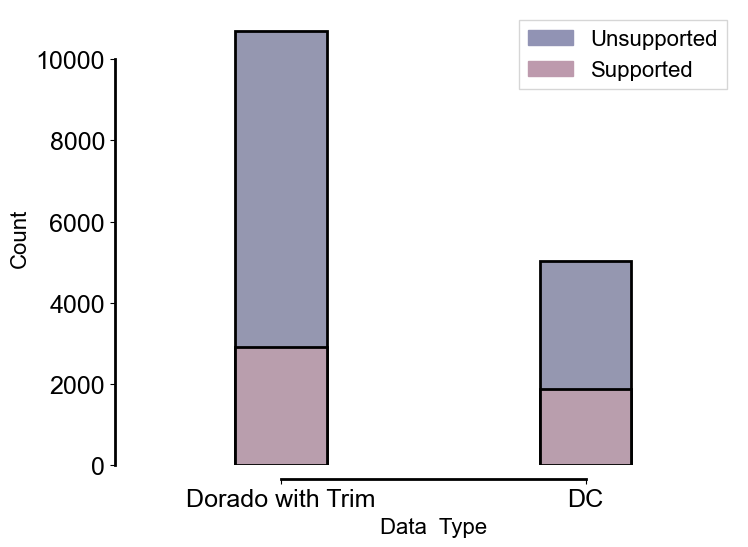

In [24]:
plot_event(
    vcap_004_event_data,
    type_names_other_platform,
    figname="vcap004_group_chimeric_bar_plot.pdf",
)

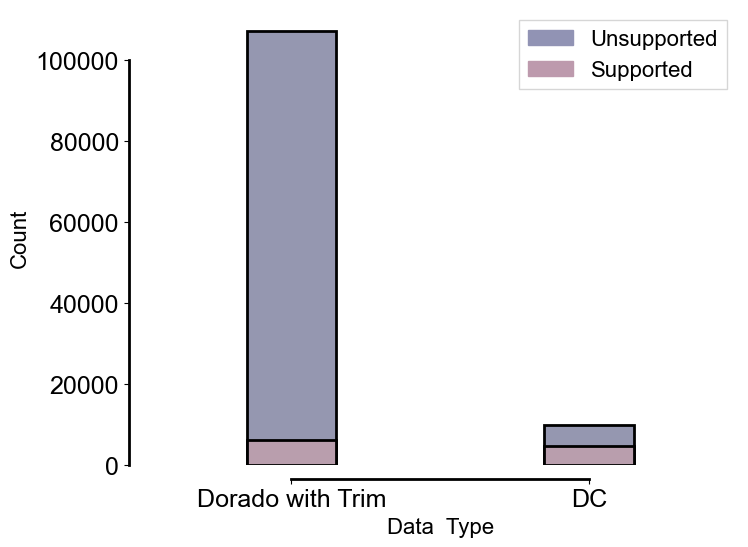

In [16]:
plot_event(
    vcap_002_event_data,
    type_names_other_platform,
    figname="vcap002_group_chimeric_bar_plot.pdf",
)

In [29]:
# appeal letter plot

appeal_type_names_other_platform = ["Dorado with Trim", "Dorado with Trim + DC", "DC"]

appeal_vcap_002_event_data = {
    appeal_type_names_other_platform[0]: [555, 17],
    appeal_type_names_other_platform[1]: [72, 52],
    appeal_type_names_other_platform[2]: [60, 20],
}


def plot_appeal_event(
    data,
    type_names,
    figsize=(8, 6),
    color1=e2,
    color2=e3,
    figname="appeal_group_chimeric_bar_plot.pdf",
):
    fig, ax = plt.subplots(figsize=figsize)

    dtype_df = prepare_data_other_platform(data, type_names)

    bar_width = 0.3

    # add legend
    top_bar = mpatches.Patch(color=color1, label="Unsupported")
    bottom_bar = mpatches.Patch(color=color2, label="Supported")

    bar1 = sns.barplot(
        data=dtype_df.groupby("data type")["value"].sum().reset_index(),
        x="data type",
        y="value",
        order=type_names,
        color=color1,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
        ax=ax,
    )
    bar2 = sns.barplot(
        data=dtype_df.query("type == 'Validated'"),
        x="data type",
        y="value",
        order=type_names,
        estimator=sum,
        color=color2,
        edgecolor="k",
        linewidth=2,
        width=bar_width,
        ax=ax,
    )
    ax.legend(handles=[top_bar, bottom_bar], fancybox=False)

    ax.set_ylabel("Count")
    ax.set_xlabel("Data  Type")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

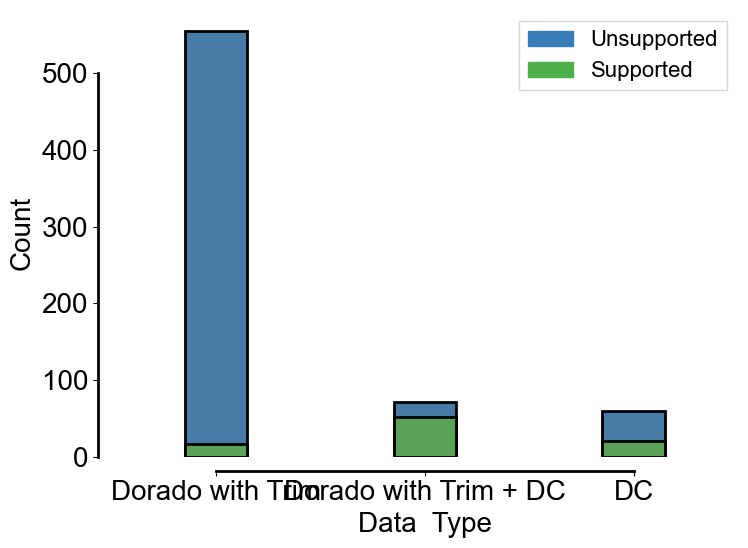

In [ ]:
plot_appeal_event(
    appeal_vcap_002_event_data,
    appeal_type_names_other_platform,
    color1=f1,
    color2=f2,
    figname="appeal_vcap002_gene_fusion_with_cdna_plot.pdf",
)

# F1D BLAT for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [11]:
# load data
plot_data_vcap_002 = json.load(
    open("data/internal_prediction_seq_blat_top1_indentities.json")
)
plot_data_vcap_004 = json.load(
    open("data/fp_vcap_004_hyena_all_predicts_blat_identities.json")
)

In [12]:
len(plot_data_vcap_002)

98807

In [13]:
len(plot_data_vcap_004)

6185

In [16]:
np.mean(plot_data_vcap_004)

0.377340345643654

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

Text(0.5, 0, 'BLAT Indentity')

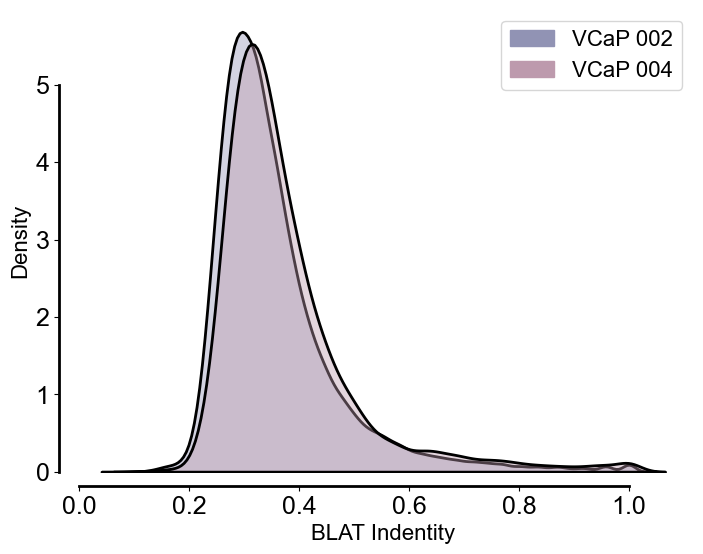

In [62]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=plot_data_vcap_002, fill=True, color=e2, edgecolor="k", linewidth=2, alpha=0.4
)
sns.kdeplot(
    data=plot_data_vcap_004, fill=True, color=e3, edgecolor="k", linewidth=2, alpha=0.4
)

left_bar = mpatches.Patch(color=e2, label="VCaP 002")
right_bar = mpatches.Patch(color=e3, label="VCaP 004")
plt.legend(handles=[left_bar, right_bar], loc="upper right")

sns.despine(offset=10, trim=True)
plt.xlabel("BLAT Indentity")
# plt.ylabel("Density")
plt.savefig(
    "blat_for_fp_internal_prediction_cmp_with_dorado.pdf", bbox_inches="tight", dpi=300
)

In [21]:
def box_distribution_plot(data, figsize=(8, 6), figname="box_distri_plot.pdf"):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data, ax=ax, palette=[e2, e3])
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.savefig(figname, dpi=300)

<Axes: >

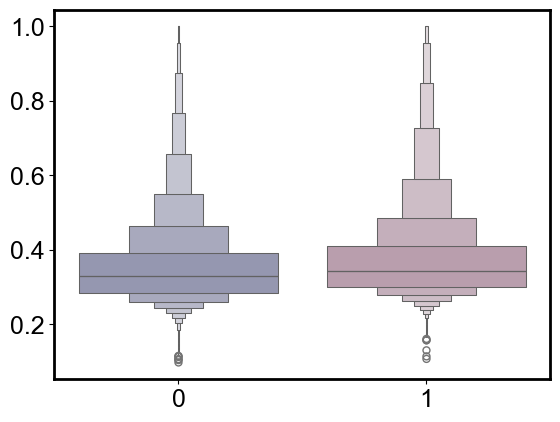

In [22]:
sns.boxenplot(data=[plot_data_vcap_002, plot_data_vcap_004], palette=[e2, e3])

In [104]:
def distributio_plot(data, figsize=(8, 6), color=e2, alpha=1, file_name=""):
    plt.figure(figsize=(7, 6))
    sns.kdeplot(data=data, fill=True, color=color, edgecolor="k", linewidth=2, alpha=1)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.xlabel("BLAT Indentity")
    plt.savefig(f"identity_distribution_{file_name}.pdf", dpi=300)

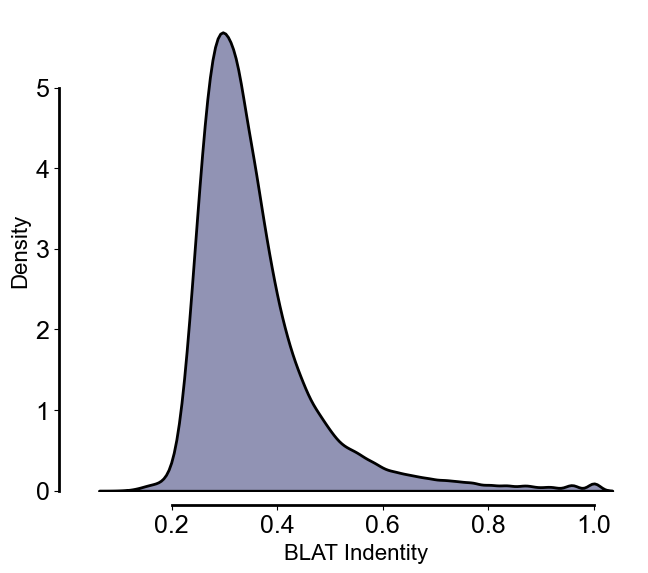

In [105]:
distributio_plot(plot_data_vcap_002, color=e2, file_name="vcap_002")

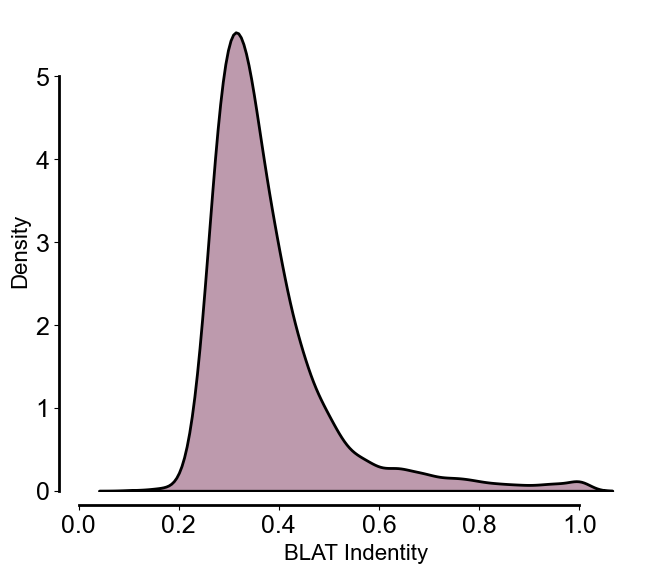

In [106]:
distributio_plot(plot_data_vcap_004, color=e3, file_name="vcap_004")

# F1E Base Quals for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [17]:
import json

In [18]:
def plot_qual(file_path):
    from needletail import parse_fastx_file

    quals = []
    for record in parse_fastx_file(file_path):
        current_quals = [ord(i) - 33 for i in list(record.qual)]
        quals.append(sum(current_quals) / len(current_quals))
    return quals

In [10]:
# load data
plot_data_remove_seq_base_quals_vcap002 = [
    i - 33 for i in json.load(open("data/internal_prediction_seq_base_quals.json"))
]
# load data
# plot_qual_left_seq_data = plot_qual("./data/fp_dorado_hyena_vcap_002.fq.gz")

In [26]:
# len(plot_qual_left_seq_data)

In [11]:
len(plot_data_remove_seq_base_quals_vcap002)

146580

In [19]:
plot_data_remove_seq_base_quals_vcap004 = [
    i - 33 for i in json.load(open("data/fp_vcap_004_hyena_predicts_base_quals.json"))
]
# vcap_plot_qual_left_seq_data = plot_qual("./data/fp_dorado_hyena_vcap_004.fq.gz")

In [20]:
len(plot_data_remove_seq_base_quals_vcap004)

11143

In [23]:
np.mean(plot_data_remove_seq_base_quals_vcap004)

7.8492878315534425

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Base Qual')

Text(0.5, 0, 'Base Qual')

Text(0, 0.5, 'Density')

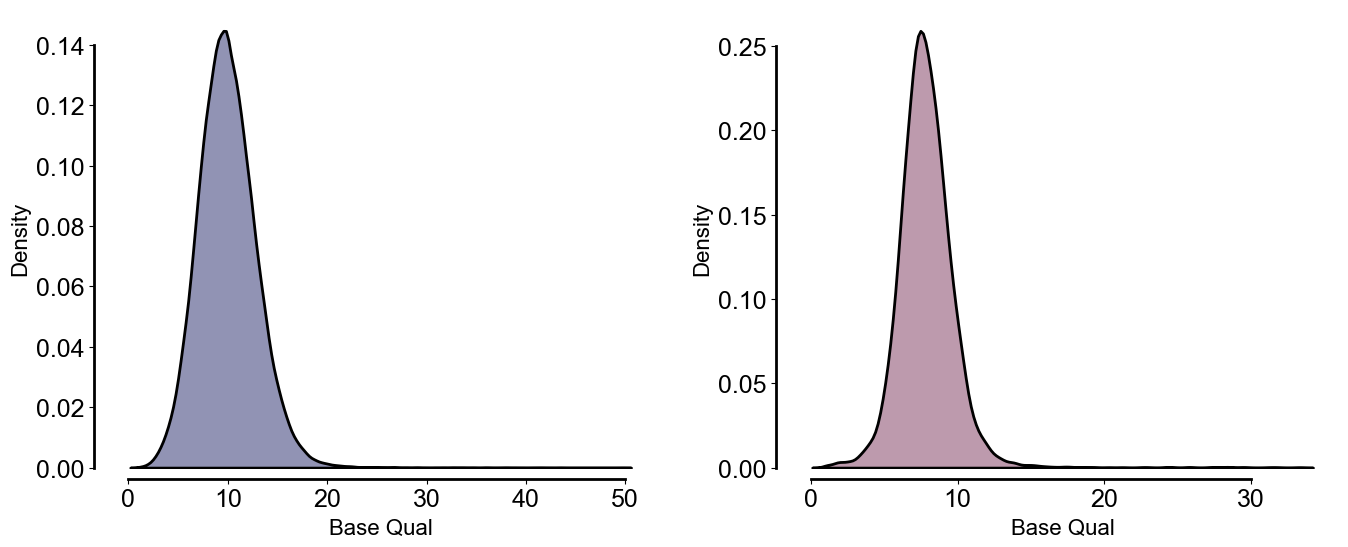

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
axs = axs.flatten()

sns.kdeplot(
    data=plot_data_remove_seq_base_quals_vcap002,
    fill=True,
    color=e2,
    edgecolor="k",
    linewidth=2,
    alpha=1,
    ax=axs[0],
)

# sns.kdeplot(
#     data=plot_qual_left_seq_data,
#     fill=True,
#     color=e3,
#     edgecolor="k",
#     linewidth=2,
#     ax=axs[0],
# )

sns.kdeplot(
    data=plot_data_remove_seq_base_quals_vcap004,
    fill=True,
    color=e3,
    edgecolor="k",
    linewidth=2,
    alpha=1,
    ax=axs[1],
)

# sns.kdeplot(
#     data=vcap_plot_qual_left_seq_data,
#     fill=True,
#     color=e3,
#     edgecolor="k",
#     linewidth=2,
#     ax=axs[1],
# )

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=8, trim=True)

axs[0].set_xlabel("Base Qual")
axs[1].set_xlabel("Base Qual")
plt.ylabel("Density")


plt.tight_layout()

# fig.subplots_adjust(wspace=0.1)

plt.savefig(
    "base_quals_for_fp_internal_prediction_cmp_with_dorado.pdf",
    bbox_inches="tight",
    dpi=300,
)

### F1 Boxplot of BLAT and Qual for PolyA motif for internal prediction FP (Dorado chemeric reads - DC chemeric reads)

In [27]:
def plot_box_for_base_qual_and_blat(
    base_qual,
    blat_identity,
    figsize=(8, 6),
    c1=d1,
    c2=d3,
    width=0.4,
    plot_type="violinplot",
    figname="base_qual_blat_identity_box_plot.pdf",
):
    # Creating a DataFrame for the plot
    t1 = "Base Quality"
    t2 = "BLAT Identity"

    df1 = pd.DataFrame({"Score": base_qual, "Type": t1})

    df2 = pd.DataFrame({"Score": blat_identity, "Type": t2})

    # Concatenating the dataframes
    df = pd.concat([df1, df2])

    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    getattr(sns, plot_type)(
        x="Type",
        y="Score",
        data=df[df["Type"] == t1],
        ax=ax1,
        color=c1,
        width=width,
        fill=True,
    )
    ax1.set_ylabel(t1)

    # Plotting the boxenplot for the identity scores on the right y-axis
    getattr(sns, plot_type)(
        x="Type",
        y="Score",
        data=df[df["Type"] == t2],
        ax=ax2,
        color=c2,
        width=width,
        fill=True,
    )
    ax2.set_ylabel(t2)
    ax2.set_ylim(0, 1)

    # ax2.spines['right'].set_color(d3)
    # ax2.yaxis.label.set_color(d3)
    # ax2.tick_params(axis='y', colors=d3)

    # Ensuring the x-axis categories do not overlap
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels([t1, t2])

    # add offset
    sns.despine(offset=10, trim=True, right=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    plt.savefig(figname, bbox_inches="tight", dpi=300)


def plot_box_for_base_qual_with_background(
    base_qual_data, figname=None, figsize=(4, 5), c1=d1, width=0.4, alpha=0.15
):
    t1 = "Base Quality"
    df1 = pd.DataFrame({"Score": base_qual_data, "Type": t1})
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxenplot(
        x="Type", y="Score", data=df1, ax=ax1, color=c1, width=width, fill=True
    )

    # draw backround color
    # 0 - 20 draw red color
    # 20 - 28 draw yellow color
    # 28 - 50 draw green color
    ax1.axhspan(0, 20, color="red", alpha=alpha, lw=0)
    ax1.axhspan(20, 40, color="yellow", alpha=alpha, lw=0)
    ax1.axhspan(40, ax1.get_yticks()[-1], color="green", alpha=alpha, lw=0)

    ax1.set_ylabel(t1)
    # add offset
    sns.despine(offset=10, trim=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    if figname:
        plt.savefig(figname, bbox_inches="tight", dpi=300)


def plot_box_for_blat_identity_without_background(
    blat_identity_data, figname=None, figsize=(4, 5), c2=d2, width=0.4
):
    t2 = "BLAT Identity"
    df2 = pd.DataFrame({"Score": blat_identity_data, "Type": t2})
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxenplot(
        x="Type", y="Score", data=df2, ax=ax1, color=c2, width=width, fill=True
    )

    ax1.set_ylabel(t2)

    sns.despine(offset=10, trim=False)
    fig.tight_layout()
    if figname:
        plt.savefig(figname, bbox_inches="tight", dpi=300)


def plot_distribution_for_base_qual_with_background(
    base_qual_data, figname=None, figsize=(4, 5), c1=d1, width=0.4, alpha=0.15
):
    t1 = "Base Quality"
    df1 = pd.DataFrame({"Score": base_qual_data, "Type": t1})
    fig, ax1 = plt.subplots(figsize=figsize)

    sns.kdeplot(
        data=base_qual_data,
        fill=True,
        color=c1,
        edgecolor="k",
        linewidth=2,
        alpha=1,
        ax=ax1,
    )

    # draw backround color
    # 0 - 20 draw red color
    ax1.axvspan(0, 20, color="red", alpha=alpha, lw=0)
    ax1.axvspan(20, 40, color="yellow", alpha=alpha, lw=0)
    ax1.axvspan(40, ax1.get_xticks()[-1], color="green", alpha=alpha, lw=0)

    ax1.set_xticks(range(0, 55, 10))
    ax1.set_ylabel(t1)
    # add offset
    sns.despine(offset=10, trim=False)

    # Adjusting the plot to avoid overlapping of labels
    fig.tight_layout()
    if figname:
        plt.savefig(figname, bbox_inches="tight", dpi=300)

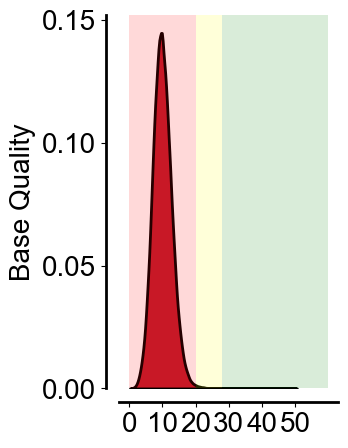

In [23]:
plot_distribution_for_base_qual_with_background(
    plot_data_remove_seq_base_quals_vcap002,
    figname="vcap002_base_qual_distribution_plot_with_background.pdf",
)

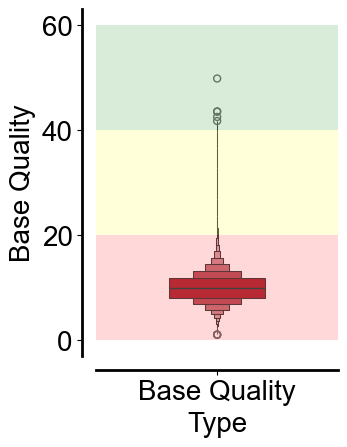

In [15]:
plot_box_for_base_qual_with_background(
    plot_data_remove_seq_base_quals_vcap002,
    c1=d1,
    figname="vcap002_base_qual_box_plot_with_background_2.pdf",
)

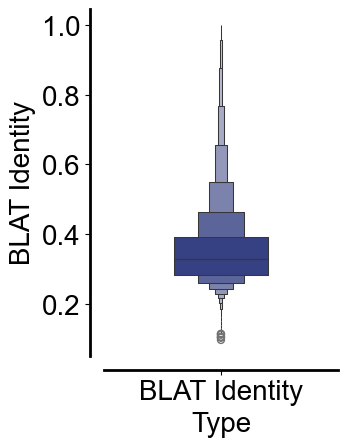

In [100]:
plot_box_for_blat_identity_without_background(
    plot_data_vcap_002,
    c2=d3,
    figname="vcap002_blat_identity_box_plot_without_background.pdf",
)

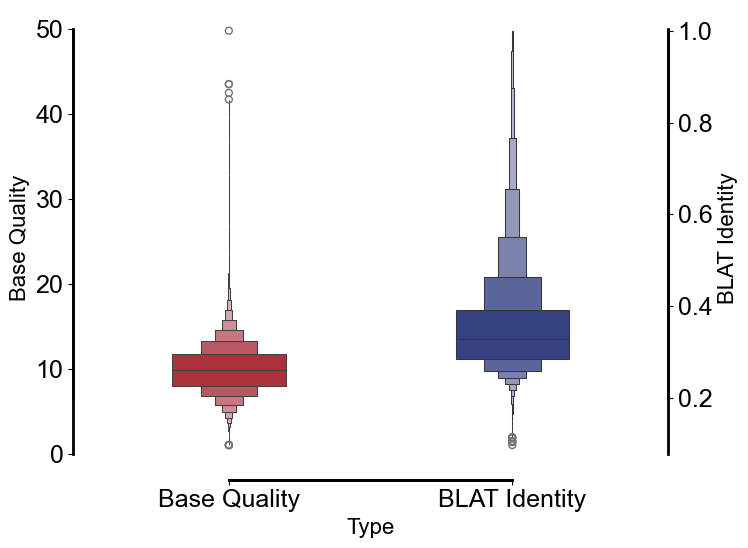

In [101]:
plot_box_for_base_qual_and_blat(
    plot_data_remove_seq_base_quals_vcap002,
    plot_data_vcap_002,
    plot_type="boxenplot",
    figname="vcap002_base_qual_and_blat_box_plot.pdf",
)

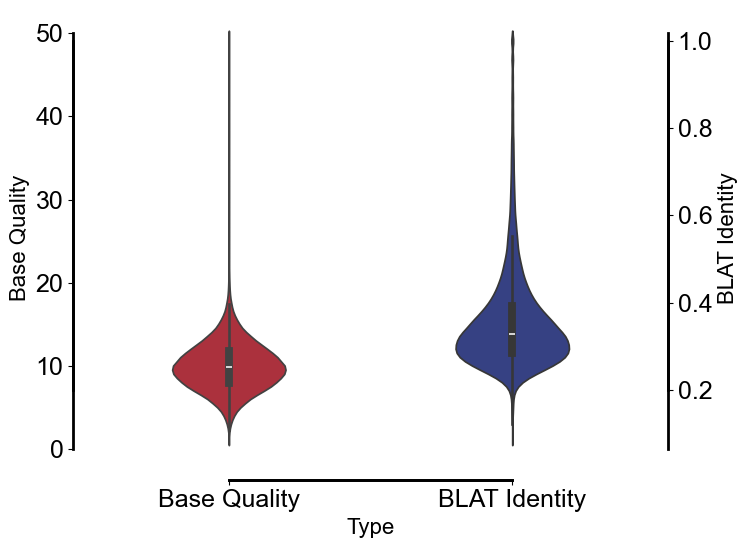

In [102]:
plot_box_for_base_qual_and_blat(
    plot_data_remove_seq_base_quals_vcap002,
    plot_data_vcap_002,
    plot_type="violinplot",
    figname="vcap002_base_qual_and_blat_violinplot_plot.pdf",
)

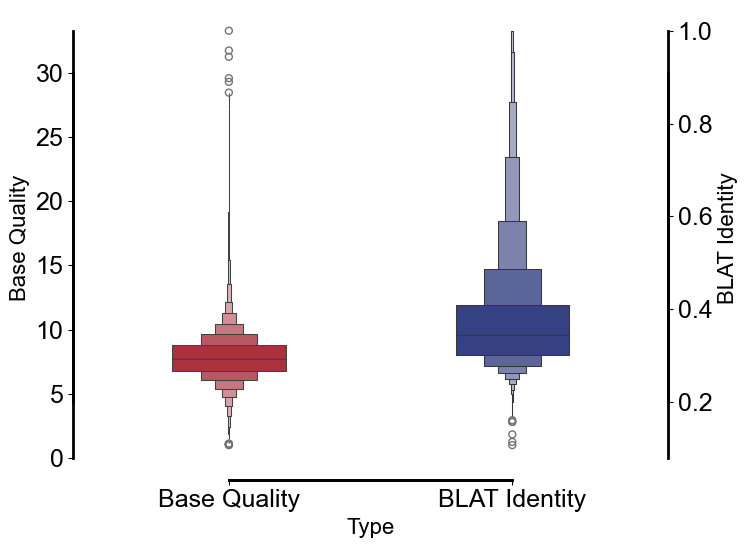

In [115]:
plot_box_for_base_qual_and_blat(
    plot_data_remove_seq_base_quals_vcap004,
    plot_data_vcap_004,
    plot_type="boxenplot",
    figname="vcap004_base_qual_and_blat_box_plot.pdf",
)

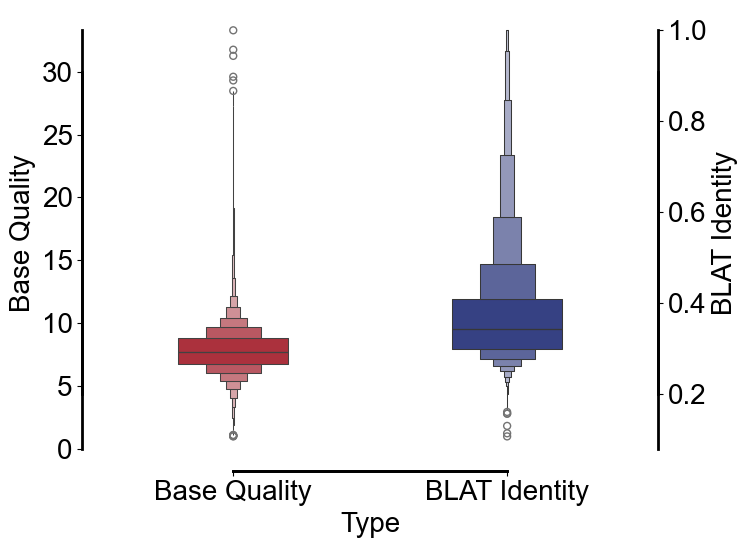

In [26]:
plot_box_for_base_qual_and_blat(
    plot_data_remove_seq_base_quals_vcap004, plot_data_vcap_004, plot_type="boxenplot"
)

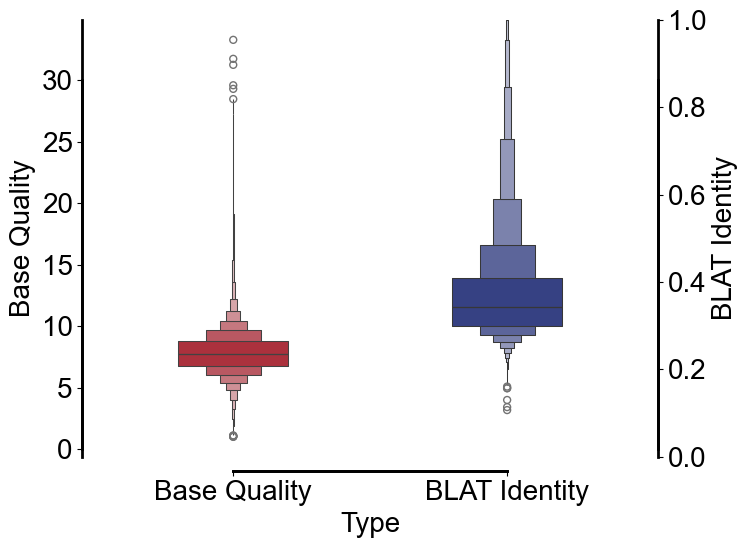

In [30]:
plot_box_for_base_qual_and_blat(
    plot_data_remove_seq_base_quals_vcap004,
    plot_data_vcap_004,
    plot_type="boxenplot",
    figname="tmp.pdf",
)

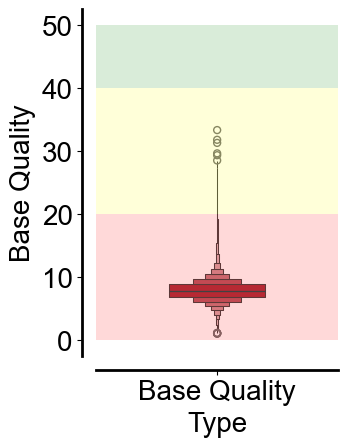

In [16]:
plot_box_for_base_qual_with_background(
    plot_data_remove_seq_base_quals_vcap004,
    c1=d1,
    figname="vcap004_base_qual_box_plot_with_background_2.pdf",
)

# F1 Histogram for Count of left seq

In [10]:
import json

In [11]:
left_seq_counts = json.load(open("data/vcap_002_left_seq_counts.json"))

In [12]:
left_seq_counts_larger_than_1 = [v for k, v in left_seq_counts.items() if v > 1]

In [13]:
len(left_seq_counts_larger_than_1)

171204

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter


def plot_histogram_with_cut(data, color, xlabel, ylabel, file_name=None):
    # Count occurrences of each value
    value_counts = Counter(data)

    # Sort the counts
    sorted_counts = sorted(value_counts.items(), key=lambda x: x[0])
    values, counts = zip(*sorted_counts)

    # Identify the highest count
    max_count = max(counts)

    # Create the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(
        2,
        1,
        figsize=(7, 6),
        sharex=True,
        gridspec_kw={"height_ratios": [1, 4], "hspace": 0.05},
    )

    # Plot the highest count in the top subplot
    ax1.bar(
        [values[counts.index(max_count)]],
        [max_count],
        color=color,
        edgecolor="k",
        linewidth=2,
    )
    ax1.set_ylim(
        ax1.get_ylim()[0], ax1.get_ylim()[1] * 1.1
    )  # Add some space at the top

    # Plot the rest of the data in the bottom subplot
    other_counts = [c if c != max_count else 0 for c in counts]
    ax2.bar(values, other_counts, color=color, edgecolor="k", linewidth=2)

    # Set labels
    ax2.set_xlabel(xlabel)
    fig.text(0.04, 0.5, ylabel, va="center", rotation="vertical")

    # Remove top subplot's x-axis
    ax1.xaxis.set_visible(False)
    ax1.spines["bottom"].set_visible(False)

    # Add broken axis effect
    d = 0.015  # size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    # ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)

    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Remove unnecessary spines
    sns.despine(ax=ax1, bottom=True)
    sns.despine(ax=ax2)

    # Set x-ticks to integers
    ax2.set_xticks(values)
    ax2.set_xticklabels(values)

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

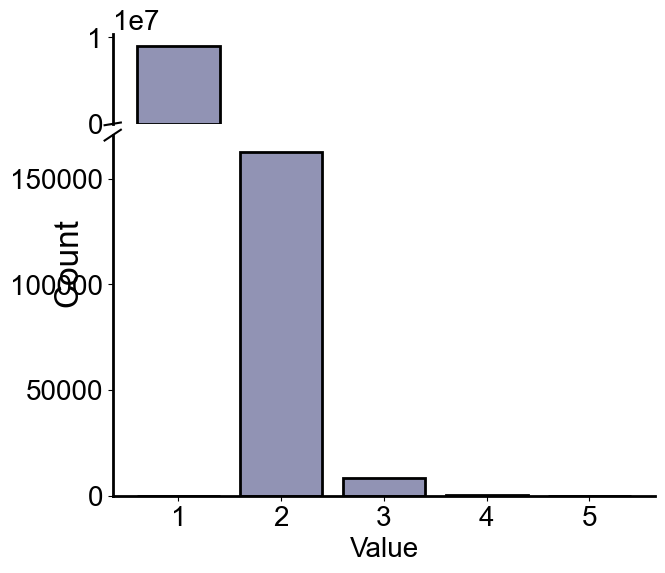

In [29]:
plot_histogram_with_cut(
    list(left_seq_counts.values()),
    e2,
    "Value",
    "Count",
    file_name="count_of_vcap_002_left_seq_per_read_all_with_cut.pdf",
)

<Figure size 700x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Left Intervals Per Read')

Text(0, 0.5, 'Count (Log Scale)')

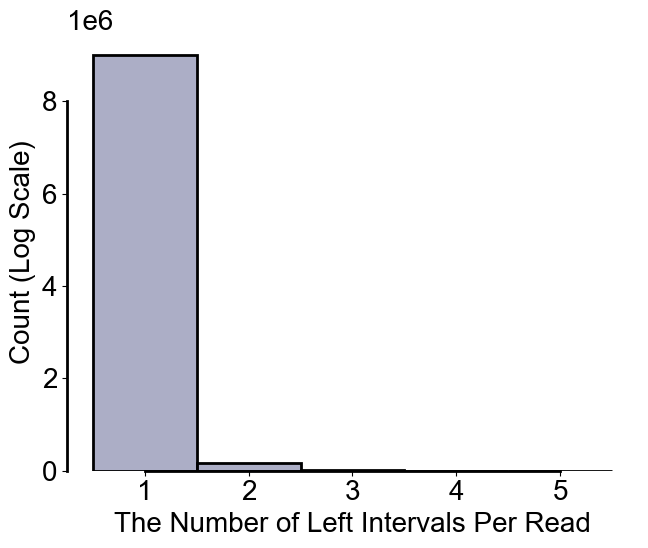

In [175]:
plt.figure(figsize=(7, 6))

sns.histplot(
    list(left_seq_counts.values()),
    kde=False,
    color=e2,
    edgecolor="k",
    linewidth=2,
    discrete=True,
)
# plt.yscale('log')

plt.xlabel("The Number of Left Intervals Per Read")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("count_of_vcap_002_left_seq_per_read_all.pdf", dpi=300)

<Figure size 500x400 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Intervals Per Predict')

Text(0, 0.5, 'Count (Log Scale)')

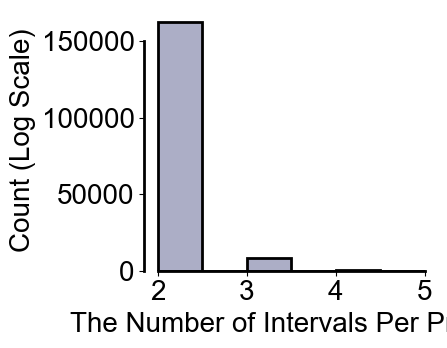

In [33]:
plt.figure(figsize=(5, 4))

sns.histplot(
    left_seq_counts_larger_than_1,
    kde=False,
    color=e2,
    edgecolor="k",
    linewidth=2,
    binwidth=0.5,
)
# plt.hist(left_seq_counts_larger_than_1,  color=e2, edgecolor="k", linewidth=2, align="mid")

# plt.yscale('log')
# plt.xticks(range(0, max_x, 1))

plt.xlabel("The Number of Chopped Intervals Per Read")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("count_of_vcap_002_left_seq_per_read.pdf", dpi=300)

# F2A Gene Size Distribution for FP

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns


def distribution_plot_f2a(data1, data2, figure_name):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot histogram
    sns.histplot(data1, kde=False, color=e1, label="All genes", ax=ax, binwidth=500)
    sns.histplot(data2, kde=False, color=e3, label="Target genes", ax=ax, binwidth=500)

    # Set labels and title
    ax.set_xlabel("Gene effective size")
    ax.set_ylabel("Frequency")
    ax.set_title("")

    ax.set_xlim(0, 20000)
    ax.set_ylim(0, 20000)
    # ax.set_xscale('log')

    # Add legend
    ax.legend()

    sns.despine(offset=0, trim=True)

    fig.tight_layout()

    fig.savefig(
        f"{figure_name}",
        dpi=300,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )
    # plt.close()


def data_preparation_f2a(all_file, target_file, col_name):
    all_genes = pd.read_csv(all_file, sep="\t", index_col=0)
    target_genes = pd.read_csv(target_file, sep="\t", index_col=0)
    all_data = list(all_genes[col_name])
    target_data = list(target_genes[col_name])
    return all_data, target_data


def f2a_plot(all_file, target_file, col_name, figure_name):
    all_data, target_data = data_preparation_f2a(all_file, target_file, col_name)
    distribution_plot_f2a(all_data, target_data, figure_name)

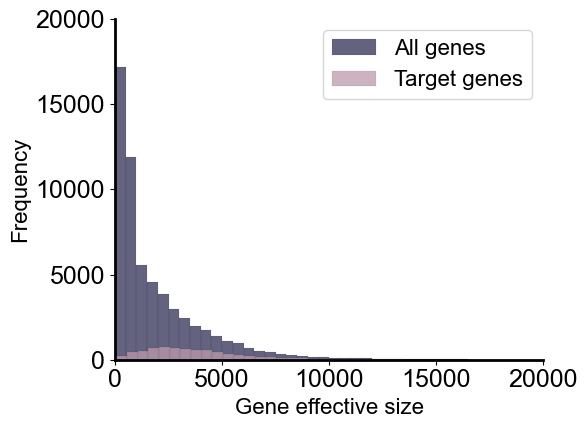

In [140]:
f2a_plot(
    "data/gene_size.txt",
    "data/FP_exp.gene_size.txt",
    "maximum_effective_size",
    "gene_effective_size.pdf",
)

# F2B Gene Expression for FP

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


def box_plot(data, figure_name):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot histogram
    sns.boxplot(
        x="group",
        y="exp",
        width=0.3,
        data=data,
        ax=ax,
        fill=False,
        whis=100000,
        showcaps=False,
    )

    # Set labels and title
    # ax.set_xlabel("Gene effective size")
    ax.set_xlabel("")
    ax.set_ylabel("Gene expression level")
    ax.set_title("")

    # ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.minorticks_off()
    # ax.set_xlim(0, 20000)
    ax.set_yscale("log")

    # Add legend
    # ax.legend()

    sns.despine(trim=True, left=False)
    fig.tight_layout(w_pad=1.1)
    fig.savefig(
        f"{figure_name}",
        dpi=300,
        facecolor="w",
        edgecolor="w",
        bbox_inches="tight",
    )


def data_preparation_f2b(all_file, target_file, col_name):
    all_genes = pd.read_csv(all_file, sep="\t", index_col=0)
    target_genes = pd.read_csv(target_file, sep="\t", index_col=0)
    all_data = list(all_genes[col_name])
    target_data = list(target_genes[col_name])

    data = pd.DataFrame(
        {
            "exp": np.concatenate([all_data, target_data]),
            "group": ["all_genes"] * len(all_data)
            + ["target_genes"] * len(target_data),
        }
    )
    all_exp = data[data["group"] == "all_genes"]["exp"]
    target_exp = data[data["group"] == "target_genes"]["exp"]

    print(mannwhitneyu(target_exp, all_exp, alternative="greater"))

    return data


def f2b_boxplot(all_file, target_file, col_name, figure_name):
    data = data_preparation_f2b(all_file, target_file, col_name)
    box_plot(data, figure_name)


MannwhitneyuResult(statistic=104581185.5, pvalue=0.0)


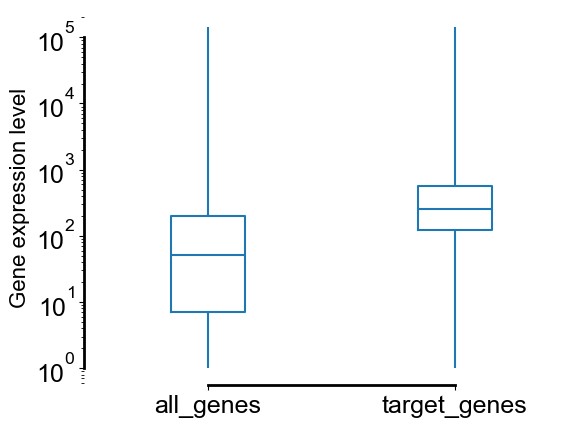

In [146]:
f2b_boxplot(
    "data/dorado.gene_exp.txt", "data/FP_exp.gene_exp.txt", "exp_count", "gene_exp.pdf"
)

# FS2A distribution of false positives across chr

## Vcap 002  

In [ ]:
# [2024-07-17T15:42:11Z INFO  internal] Total number of reads: 175094
# [2024-07-17T15:42:11Z INFO  internal] Number of reads with SA tag: 869
# [2024-07-17T15:42:11Z INFO  internal] Number of reads without SA tag: 174225
# [2024-07-17T15:42:11Z INFO  internal] Summary saved to sa_summary.json
# [2024-07-17T15:42:11Z INFO  internal] elapsed time: 666.45ms

In [109]:
import pysam
import json

In [19]:
samfile = pysam.AlignmentFile("data/fp_dorado_hyena_vcap_002.bam", "rb")

# len([1 for read in samfile.fetch() if read.is_mapped and not read.is_secondary and not read.is_supplementary])

# len([1 for read in samfile.fetch() if not read.is_mapped])

# for read in samfile.fetch():
#     if read.is_unmapped:
#         print(read)

In [28]:
# read_ids = [read.query_name for read in samfile.fetch()]
for read in samfile.fetch():
    if read.query_name == "a08a11cf-887d-4279-8724-26fafa1abcf5":
        print(read.reference_name, read.mapping_quality, read.is_mapped)
        if read.has_tag("SA") and not read.is_secondary and not read.is_supplementary:
            print(read.get_tag("SA"))
        # print(read)

chr10 38 True
chr11 60 True
chr6 0 True
chr6 0 True
chr8 60 True
chr11,46428626,-,82S506M21D941S,60,97;chr10,124490384,-,390S297M13240D842S,38,83;


In [317]:
vcap002_sa_tag_summary_path = "data/fp_dorado_hyena_vcap_004_do_sa_summary.json"
vcap002_sa_tag_summary = json.load(open(vcap002_sa_tag_summary_path))

In [318]:
len(vcap002_sa_tag_summary)

7112

In [319]:
vcap002_sa_tag_summary

{'d32ba401-1fd3-4e42-997b-5e309fd5fb28': ['chr5:82787979', 'chr3:90175434'],
 '973ffc31-407a-47f3-b87d-d5f217acde6f': ['chr5:181236937', 'chr3:40457889'],
 '800a8a8c-46f5-4d3d-bf74-2b5966e1d7a6': ['chr11:75399534', 'chr18:49488484'],
 'f2311dd6-451d-483b-b1a9-aaf7bdb7640b': ['chr14:96565632', 'chr14:49583579'],
 '6a4ece2c-5017-401a-a346-d2dd098db364': ['chr3:51993628', 'chrM:223'],
 'c59fba06-3fb5-42c9-9662-def453810f54': ['chr1:26472497', 'chr3:12836047'],
 '8a9bc27a-69c9-49ac-b561-8697e60b6d03': ['chr15:92882860', 'chr2:74155476'],
 '9526a1a1-579e-4512-bfa2-8683983decc4': ['chr5:37605063', 'chr12:76084571'],
 '376989ec-1182-4410-a7bc-749bc8274180': ['chr21:8392678', 'chrX:136873461'],
 '7816a5e0-f2f5-44c2-8863-9a834a9fa50d': ['chr11:17074389', 'chr5:82276060'],
 '7641654a-66f4-408c-b618-37d7dedc611b': ['chr6:24029398', 'chr2:4452077'],
 'd20a2435-eb3c-4ad1-b68f-cc0f1a022262': ['chr5:181236929', 'chrX:154398509'],
 '54f73945-09cb-4fe6-aec6-2fecb12c439d': ['chr6:116247181', 'chr10:7803

In [320]:
all_chrs = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY", "chrM", "alt"]
all_chrs_index = {v: i for i, v in enumerate(all_chrs)}

In [321]:
from collections import defaultdict


def filter_data(data):
    filtered_data = defaultdict(list)
    for k, vs in data.items():
        name = k
        filtered_data[name].append((k, vs[0]))

    return filtered_data

In [275]:
# filter_vcap002_sa_tag_summary = filter_data(vcap002_sa_tag_summary)

In [322]:
def sort_value(value):
    return int(value[0].split("|")[1].split(":")[0])

In [323]:
def extract_chr(sa_summary_connection, all_chrs):
    result = defaultdict(list)

    for k, vs in sa_summary_connection.items():
        cleaned_vs = []
        for v in vs:
            chr_name = v.split(":")[0]
            if chr_name not in all_chrs:
                chr_name = "alt"
            cleaned_vs.append(chr_name)

        result[k] = cleaned_vs

    return result

In [324]:
vcap002_sa_tag_summary_connection_chr = extract_chr(vcap002_sa_tag_summary, all_chrs)

In [325]:
vcap002_sa_tag_summary_connection_chr

defaultdict(list,
            {'d32ba401-1fd3-4e42-997b-5e309fd5fb28': ['chr5', 'chr3'],
             '973ffc31-407a-47f3-b87d-d5f217acde6f': ['chr5', 'chr3'],
             '800a8a8c-46f5-4d3d-bf74-2b5966e1d7a6': ['chr11', 'chr18'],
             'f2311dd6-451d-483b-b1a9-aaf7bdb7640b': ['chr14', 'chr14'],
             '6a4ece2c-5017-401a-a346-d2dd098db364': ['chr3', 'chrM'],
             'c59fba06-3fb5-42c9-9662-def453810f54': ['chr1', 'chr3'],
             '8a9bc27a-69c9-49ac-b561-8697e60b6d03': ['chr15', 'chr2'],
             '9526a1a1-579e-4512-bfa2-8683983decc4': ['chr5', 'chr12'],
             '376989ec-1182-4410-a7bc-749bc8274180': ['chr21', 'chrX'],
             '7816a5e0-f2f5-44c2-8863-9a834a9fa50d': ['chr11', 'chr5'],
             '7641654a-66f4-408c-b618-37d7dedc611b': ['chr6', 'chr2'],
             'd20a2435-eb3c-4ad1-b68f-cc0f1a022262': ['chr5', 'chrX'],
             '54f73945-09cb-4fe6-aec6-2fecb12c439d': ['chr6', 'chr10'],
             '76857b79-2914-4ae6-8fd4-05b5bcd0aabb

In [326]:
len(vcap002_sa_tag_summary_connection_chr)

7112

In [327]:
len([i for i in vcap002_sa_tag_summary_connection_chr.values() if "alt" in i])

593

In [328]:
for k, v in vcap002_sa_tag_summary_connection_chr.items():
    if len(v) > 2:
        print(k, v)

In [191]:
vcap002_sa_tag_summary_connection_chr

defaultdict(list,
            {'d32ba401-1fd3-4e42-997b-5e309fd5fb28': ['chr5', 'chr3'],
             '973ffc31-407a-47f3-b87d-d5f217acde6f': ['chr5', 'chr3'],
             '800a8a8c-46f5-4d3d-bf74-2b5966e1d7a6': ['chr11', 'chr18'],
             'f2311dd6-451d-483b-b1a9-aaf7bdb7640b': ['chr14', 'chr14'],
             '6a4ece2c-5017-401a-a346-d2dd098db364': ['chr3', 'chrM'],
             'c59fba06-3fb5-42c9-9662-def453810f54': ['chr1', 'chr3'],
             '8a9bc27a-69c9-49ac-b561-8697e60b6d03': ['chr15', 'chr2'],
             '9526a1a1-579e-4512-bfa2-8683983decc4': ['chr5', 'chr12'],
             '376989ec-1182-4410-a7bc-749bc8274180': ['chr21', 'chrX'],
             '7816a5e0-f2f5-44c2-8863-9a834a9fa50d': ['chr11', 'chr5'],
             '7641654a-66f4-408c-b618-37d7dedc611b': ['chr6', 'chr2'],
             'd20a2435-eb3c-4ad1-b68f-cc0f1a022262': ['chr5', 'chrX'],
             '54f73945-09cb-4fe6-aec6-2fecb12c439d': ['chr6', 'chr10'],
             '76857b79-2914-4ae6-8fd4-05b5bcd0aabb

In [283]:
all_chrs_index

{'chr1': 0,
 'chr2': 1,
 'chr3': 2,
 'chr4': 3,
 'chr5': 4,
 'chr6': 5,
 'chr7': 6,
 'chr8': 7,
 'chr9': 8,
 'chr10': 9,
 'chr11': 10,
 'chr12': 11,
 'chr13': 12,
 'chr14': 13,
 'chr15': 14,
 'chr16': 15,
 'chr17': 16,
 'chr18': 17,
 'chr19': 18,
 'chr20': 19,
 'chr21': 20,
 'chr22': 21,
 'chrX': 22,
 'chrY': 23,
 'chrM': 24,
 'alt': 25}

In [329]:
def process_dorado_trim_sa_reads(sa_tag_summary, chrs, all_chr_index):
    matrix_plot = pd.DataFrame(
        np.zeros((len(chrs), len(chrs))), columns=chrs, index=chrs
    )

    for k, v in sa_tag_summary.items():
        assert len(v) == 2

        c1 = v[0]
        c2 = v[1]

        if "_" in c1:
            c1 = "alt"

        if "_" in c2:
            c2 = "alt"

        c1_index = all_chr_index[c1]
        c2_index = all_chr_index[c2]

        if c1_index > c2_index:
            c1_index, c2_index = c2_index, c1_index

        matrix_plot.iloc[c1_index, c2_index] += 1

    return matrix_plot

In [330]:
import pandas as pd
import numpy as np

matrix_data = process_dorado_trim_sa_reads(
    vcap002_sa_tag_summary_connection_chr, all_chrs, all_chrs_index
)

In [331]:
matrix_data

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,chrM,alt
chr1,39.0,47.0,44.0,37.0,49.0,48.0,38.0,21.0,36.0,31.0,...,49.0,12.0,66.0,27.0,13.0,11.0,28.0,1.0,41.0,37.0
chr2,0.0,33.0,39.0,24.0,36.0,42.0,20.0,16.0,37.0,11.0,...,48.0,6.0,63.0,17.0,14.0,14.0,22.0,2.0,39.0,31.0
chr3,0.0,0.0,19.0,28.0,37.0,43.0,29.0,21.0,39.0,31.0,...,53.0,6.0,53.0,16.0,13.0,6.0,22.0,5.0,49.0,26.0
chr4,0.0,0.0,0.0,21.0,19.0,22.0,18.0,15.0,15.0,13.0,...,38.0,4.0,29.0,8.0,6.0,10.0,15.0,1.0,23.0,16.0
chr5,0.0,0.0,0.0,0.0,20.0,32.0,16.0,26.0,27.0,21.0,...,35.0,10.0,47.0,15.0,9.0,9.0,16.0,2.0,35.0,40.0
chr6,0.0,0.0,0.0,0.0,0.0,22.0,21.0,25.0,29.0,22.0,...,41.0,5.0,44.0,14.0,12.0,7.0,26.0,2.0,45.0,23.0
chr7,0.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,20.0,23.0,...,27.0,7.0,32.0,11.0,11.0,8.0,16.0,3.0,27.0,31.0
chr8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,23.0,8.0,...,26.0,2.0,25.0,14.0,9.0,6.0,9.0,0.0,25.0,15.0
chr9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,...,39.0,11.0,57.0,17.0,12.0,8.0,16.0,2.0,33.0,20.0
chr10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,29.0,8.0,31.0,4.0,14.0,7.0,11.0,1.0,19.0,18.0


In [332]:
def heatmap(matrix_data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Assuming you have your data in matrix_data
    data = matrix_data.iloc[:25, :25]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))

    # Create the mask for the upper triangle
    mask = np.tril(np.ones_like(data, dtype=bool), k=1)

    # Create the heatmap
    sns.heatmap(
        data,
        mask=mask,
        cmap=sns.diverging_palette(150, 10, as_cmap=True),
        square=True,  # Make sure the cells are square
        linewidths=0.5,  # Add lines between cells
        cbar_kws={"shrink": 0.8},  # Adjust colorbar size
        xticklabels=False,  # Hide x-axis labels
        yticklabels=False,
    )  # Hide y-axis labels

    # Remove all ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add labels on the diagonal
    for i, label in enumerate(data.index):
        ax.text(i + 0.5, i + 0.5, label, ha="center", va="center", rotation=45)

    # Adjust the layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot
    # plt.show()

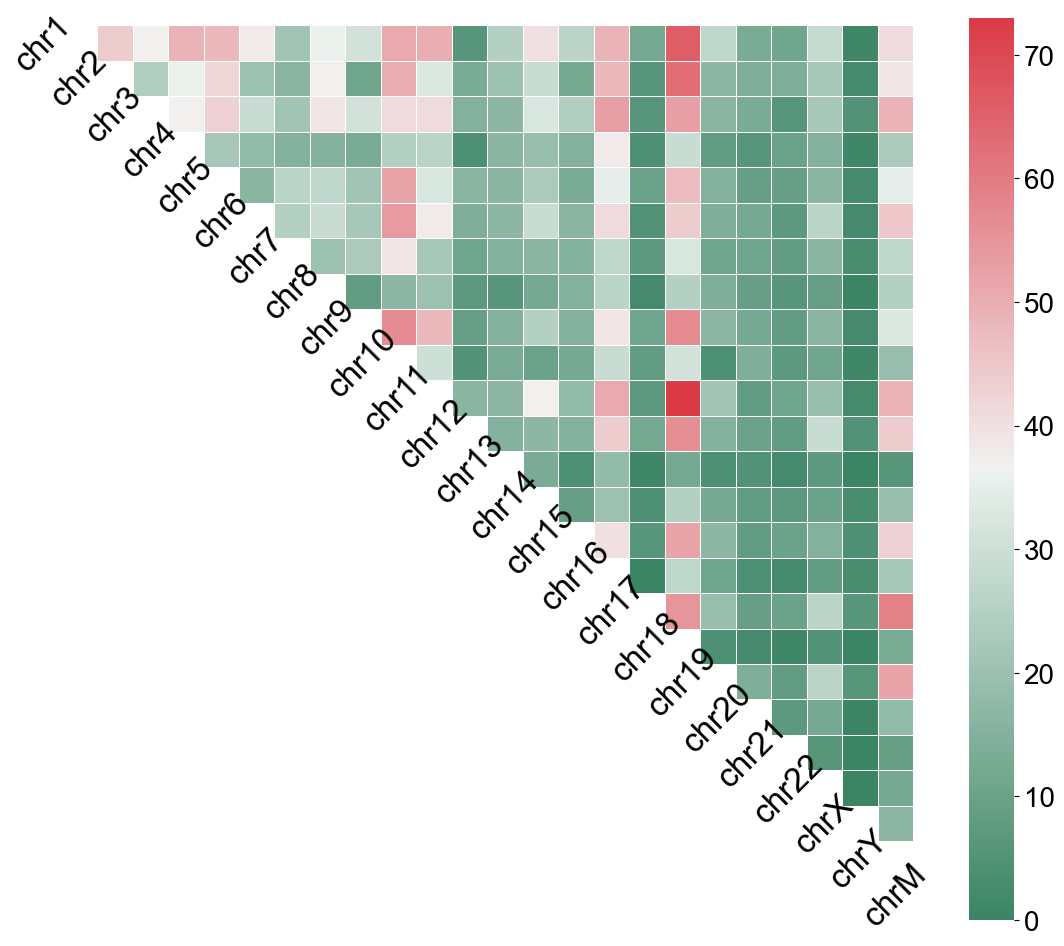

In [197]:
heatmap(matrix_data)

In [198]:
def heatmap2(matrix_data, file_name=None):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Assuming you have your data in matrix_data
    data = matrix_data.iloc[:25, :25]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 12))

    # Create the mask for the upper triangle
    mask = np.zeros_like(data)
    mask[np.tril_indices_from(mask, k=-1)] = True

    # Create a more contrasting and diverse color palette
    cmap = sns.diverging_palette(240, 10, as_cmap=True, center="light", s=99, l=50, n=9)

    # Create the heatmap
    sns.heatmap(
        data,
        mask=mask,
        cmap=cmap,
        square=True,  # Make sure the cells are square
        linewidths=1,  # Add lines between cells
        cbar_kws={"shrink": 0.8},  # Adjust colorbar size
        xticklabels=False,  # Hide x-axis labels
        yticklabels=True,  # Hide y-axis labels
        center=0,  # Center the colormap at 0
        vmin=data.min().min(),
        vmax=data.max().max(),
    )  # Set the range of values

    # Adjust the layout to prevent clipping of labels
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

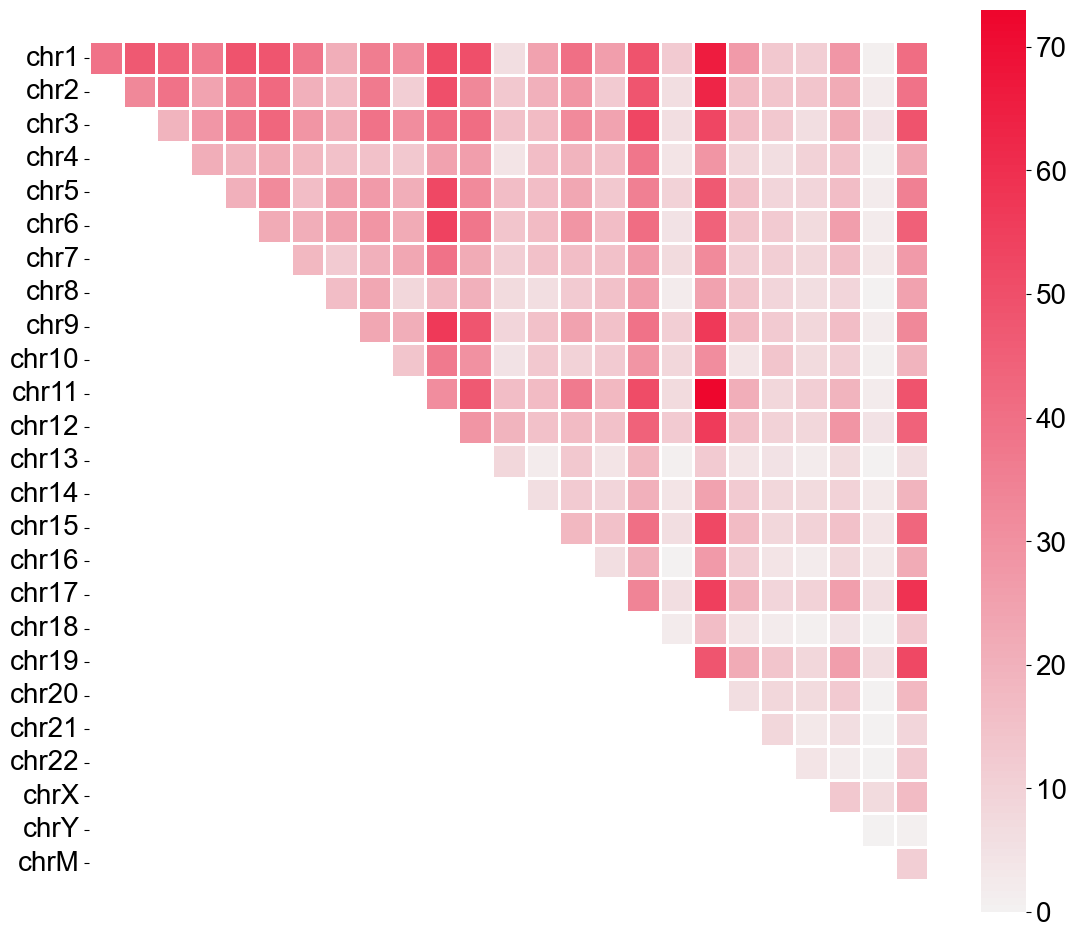

In [199]:
heatmap2(matrix_data, file_name="heatmap_chrom_connection_vcap004.pdf")

<Axes: >

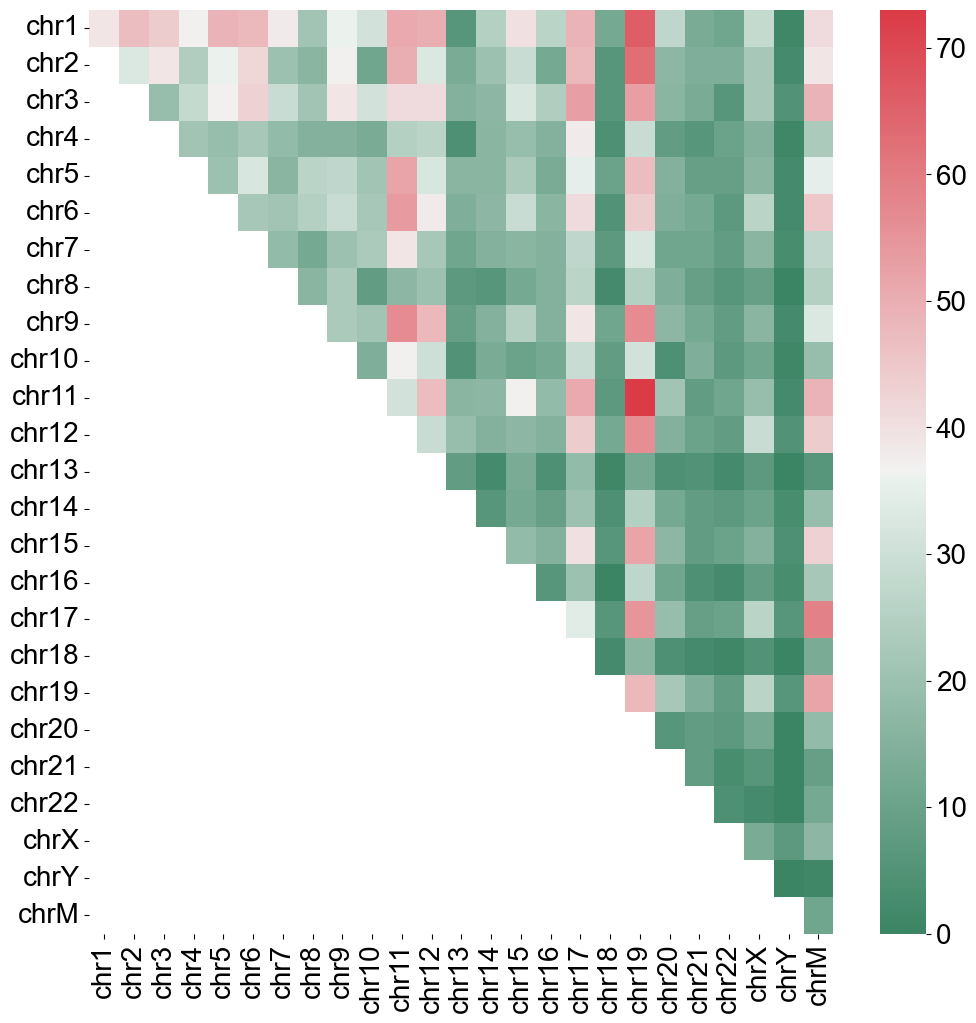

In [333]:
data = matrix_data.iloc[:25, :25]
fig, ax1 = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data)
mask[np.tril_indices_from(mask, k=-1)] = True
sns.heatmap(data, mask=mask, cmap=sns.diverging_palette(150, 10, as_cmap=True))

In [334]:
data

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,chrM
chr1,39.0,47.0,44.0,37.0,49.0,48.0,38.0,21.0,36.0,31.0,...,26.0,49.0,12.0,66.0,27.0,13.0,11.0,28.0,1.0,41.0
chr2,0.0,33.0,39.0,24.0,36.0,42.0,20.0,16.0,37.0,11.0,...,12.0,48.0,6.0,63.0,17.0,14.0,14.0,22.0,2.0,39.0
chr3,0.0,0.0,19.0,28.0,37.0,43.0,29.0,21.0,39.0,31.0,...,24.0,53.0,6.0,53.0,16.0,13.0,6.0,22.0,5.0,49.0
chr4,0.0,0.0,0.0,21.0,19.0,22.0,18.0,15.0,15.0,13.0,...,15.0,38.0,4.0,29.0,8.0,6.0,10.0,15.0,1.0,23.0
chr5,0.0,0.0,0.0,0.0,20.0,32.0,16.0,26.0,27.0,21.0,...,13.0,35.0,10.0,47.0,15.0,9.0,9.0,16.0,2.0,35.0
chr6,0.0,0.0,0.0,0.0,0.0,22.0,21.0,25.0,29.0,22.0,...,16.0,41.0,5.0,44.0,14.0,12.0,7.0,26.0,2.0,45.0
chr7,0.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,20.0,23.0,...,15.0,27.0,7.0,32.0,11.0,11.0,8.0,16.0,3.0,27.0
chr8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,23.0,8.0,...,15.0,26.0,2.0,25.0,14.0,9.0,6.0,9.0,0.0,25.0
chr9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,...,15.0,39.0,11.0,57.0,17.0,12.0,8.0,16.0,2.0,33.0
chr10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,12.0,29.0,8.0,31.0,4.0,14.0,7.0,11.0,1.0,19.0


In [335]:
total_chrom_connection_per_chrom = data.sum(axis=1) + data.sum(axis=0) - np.diag(data)

In [336]:
total_chrom_connection_per_chrom

chr1     836.0
chr2     687.0
chr3     723.0
chr4     451.0
chr5     613.0
chr6     670.0
chr7     475.0
chr8     376.0
chr9     634.0
chr10    426.0
chr11    830.0
chr12    705.0
chr13    217.0
chr14    329.0
chr15    542.0
chr16    327.0
chr17    802.0
chr18    150.0
chr19    939.0
chr20    319.0
chr21    215.0
chr22    173.0
chrX     383.0
chrY      56.0
chrM     711.0
dtype: float64

In [337]:
raw_chrom_length = """
chr1	248956422
chr2	242193529
chr3	198295559
chr4	190214555
chr5	181538259
chr6	170805979
chr7	159345973
chrX	156040895
chr8	145138636
chr9	138394717
chr11	135086622
chr10	133797422
chr12	133275309
chr13	114364328
chr14	107043718
chr15	101991189
chr16	90338345
chr17	83257441
chr18	80373285
chr20	64444167
chr19	58617616
chrY	57227415
chr22	50818468
chr21	46709983
chrM	16569
"""
chrom_length = {
    line.split()[0]: int(line.split()[1])
    for line in raw_chrom_length.strip().split("\n")
}

In [338]:
total_chrom_connection_per_chrom_by_chrom_length = (
    total_chrom_connection_per_chrom / pd.Series(chrom_length)
)

In [339]:
# # standardized_data = (data - np.mean(data)) / np.std(data)
def min_max_scale(data, new_min=0, new_max=1):
    return (data - data.min()) * (new_max - new_min) / (
        data.max() - data.min()
    ) + new_min


In [340]:
total_chrom_connection_per_chrom_by_chrom_length

chr1     3.358017e-06
chr10    3.183918e-06
chr11    6.144206e-06
chr12    5.289802e-06
chr13    1.897445e-06
chr14    3.073511e-06
chr15    5.314185e-06
chr16    3.619725e-06
chr17    9.632773e-06
chr18    1.866292e-06
chr19    1.601908e-05
chr2     2.836575e-06
chr20    4.950021e-06
chr21    4.602870e-06
chr22    3.404274e-06
chr3     3.646073e-06
chr4     2.371007e-06
chr5     3.376699e-06
chr6     3.922579e-06
chr7     2.980935e-06
chr8     2.590627e-06
chr9     4.581100e-06
chrM     4.291146e-02
chrX     2.454485e-06
chrY     9.785520e-07
dtype: float64

In [341]:
total_chrom_connection_per_chrom_by_chrom_length = (
    total_chrom_connection_per_chrom_by_chrom_length.reindex(all_chrs[:-1])
)

In [342]:
total_chrom_connection_per_chrom_by_chrom_length

chr1     3.358017e-06
chr2     2.836575e-06
chr3     3.646073e-06
chr4     2.371007e-06
chr5     3.376699e-06
chr6     3.922579e-06
chr7     2.980935e-06
chr8     2.590627e-06
chr9     4.581100e-06
chr10    3.183918e-06
chr11    6.144206e-06
chr12    5.289802e-06
chr13    1.897445e-06
chr14    3.073511e-06
chr15    5.314185e-06
chr16    3.619725e-06
chr17    9.632773e-06
chr18    1.866292e-06
chr19    1.601908e-05
chr20    4.950021e-06
chr21    4.602870e-06
chr22    3.404274e-06
chrX     2.454485e-06
chrY     9.785520e-07
chrM     4.291146e-02
dtype: float64

In [343]:
total_chrom_connection_per_chrom_by_chrom_length.values[-1]

np.float64(0.042911461162411735)

In [344]:
def cut_bar_for_chrom_by_length(df, file_name=None):
    # Create the plot with two y-axes
    fig, (ax1, ax2) = plt.subplots(
        2,
        1,
        figsize=(15, 6),
        sharex=True,
        gridspec_kw={"height_ratios": [1, 4], "hspace": 0.05},
    )
    # Plot the data on both axes
    bars1 = ax1.bar(df.index, df.values, color=g1)
    bars2 = ax2.bar(df.index, df.values, color=g1)

    # Set the y-limits for both axes
    ax1.set_ylim(0.04, 0.045)  # for chrM vcap 004

    # ax1.set_ylim(0.34, 0.350) # for chr M vcap002

    ax2.set_ylim(0, df.values[:-1].max())  # for other chromosomes

    # Hide the x-axis labels on the top subplot
    ax1.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

    # Rotate x-axis labels on the bottom subplot
    ax2.set_xticks(
        range(len(bars2)), [f"C{i[1:3]} {i[3:]}" for i in all_chrs[:-1]], rotation=90
    )
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90, ha="right")

    # Remove the bottom spine of the top subplot and the top spine of the bottom subplot
    ax1.spines["bottom"].set_visible(False)
    ax2.spines["top"].set_visible(False)

    # Add broken axis marks
    d = 0.015  # size of the diagonal lines
    kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
    # ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes

    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

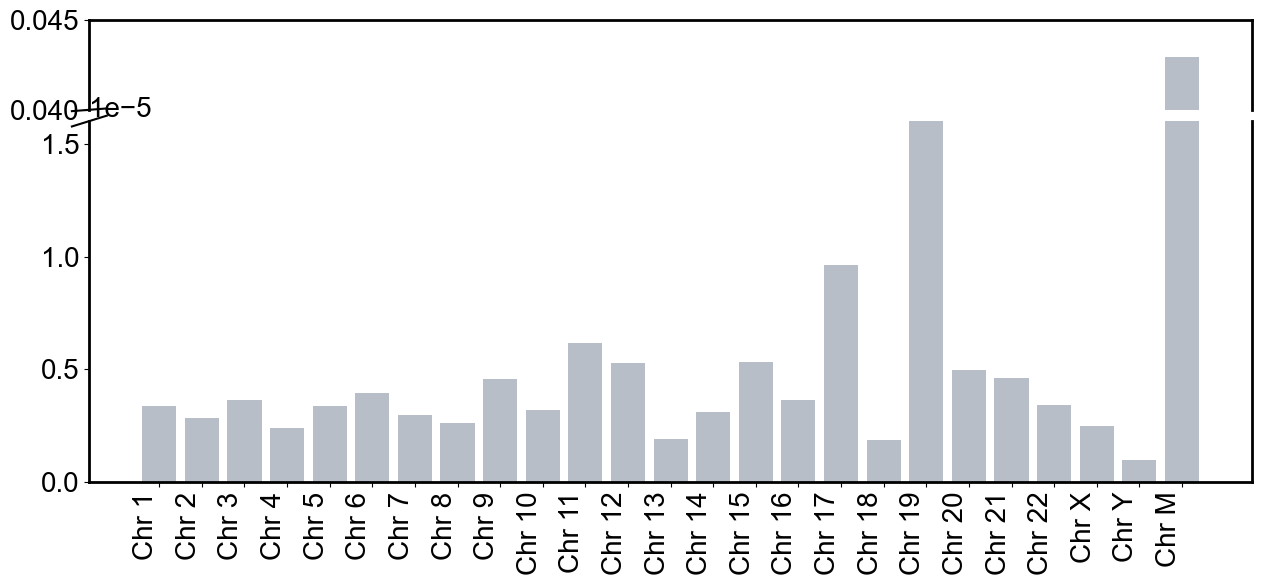

In [345]:
cut_bar_for_chrom_by_length(
    total_chrom_connection_per_chrom_by_chrom_length,
    file_name="total_chrom_connection_per_chrom_by_chrom_length_raw_data_without_log_vcap004.pdf",
)

<Axes: >

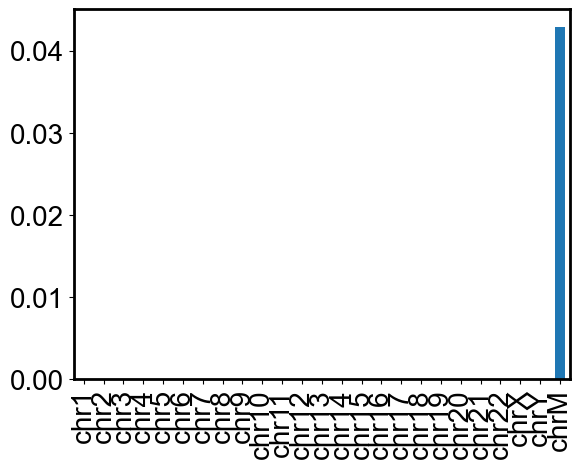

In [264]:
total_chrom_connection_per_chrom_by_chrom_length.plot(kind="bar")
# plt.yscale("log")

In [211]:
total_chrom_connection_per_chrom_by_chrom_length

chr1     3.358017e-06
chr2     2.836575e-06
chr3     3.646073e-06
chr4     2.371007e-06
chr5     3.376699e-06
chr6     3.922579e-06
chr7     2.980935e-06
chr8     2.590627e-06
chr9     4.581100e-06
chr10    3.183918e-06
chr11    6.144206e-06
chr12    5.289802e-06
chr13    1.897445e-06
chr14    3.073511e-06
chr15    5.314185e-06
chr16    3.619725e-06
chr17    9.632773e-06
chr18    1.866292e-06
chr19    1.601908e-05
chr20    4.950021e-06
chr21    4.602870e-06
chr22    3.404274e-06
chrX     2.454485e-06
chrY     9.785520e-07
chrM     4.291146e-02
dtype: float64

In [212]:
def raw_analysis(data, file_name=None):
    # Create the plot
    plt.figure(figsize=(15, 6))
    bars = plt.bar(data.index, data.values, color=g1)

    bars[-1].set_color(g2)

    # Set y-axis to log scale
    plt.yscale("log")

    plt.ylabel("Connection per Length (Log Scale)")
    plt.xticks(
        range(len(bars)), [f"C{i[1:3]} {i[3:]}" for i in all_chrs[:-1]], rotation=90
    )
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

    # # Statistical analysis
    # # Convert data to DataFrame for analysis
    # df = pd.DataFrame({'chromosome': data.index, 'value': data.values})

    # # Perform Kruskal-Wallis H-test (non-parametric alternative to one-way ANOVA)
    # h_statistic, p_value = stats.kruskal(*[group['value'].values for name, group in df.groupby('chromosome')])

    # print(f"Kruskal-Wallis H-test results:")
    # print(f"H-statistic: {h_statistic}")
    # print(f"p-value: {p_value}")

    # # Perform Dunn's test for multiple comparisons
    # from scikit_posthocs import posthoc_dunn

    # # Prepare data for Dunn's test
    # dunn_data = [group['value'].values for name, group in df.groupby('chromosome')]
    # dunn_results = posthoc_dunn(dunn_data, p_adjust='bonferroni')

    # print("\nDunn's test results (p-values):")
    # print(dunn_results)

    # # Identify significantly different pairs
    # significant_pairs = dunn_results < 0.05
    # print("\nSignificantly different chromosome pairs:")
    # for i, chr1 in enumerate(df['chromosome'].unique()):
    #     for j, chr2 in enumerate(df['chromosome'].unique()):
    #         if i < j and significant_pairs.iloc[i, j]:
    #             print(f"{chr1} - {chr2}")

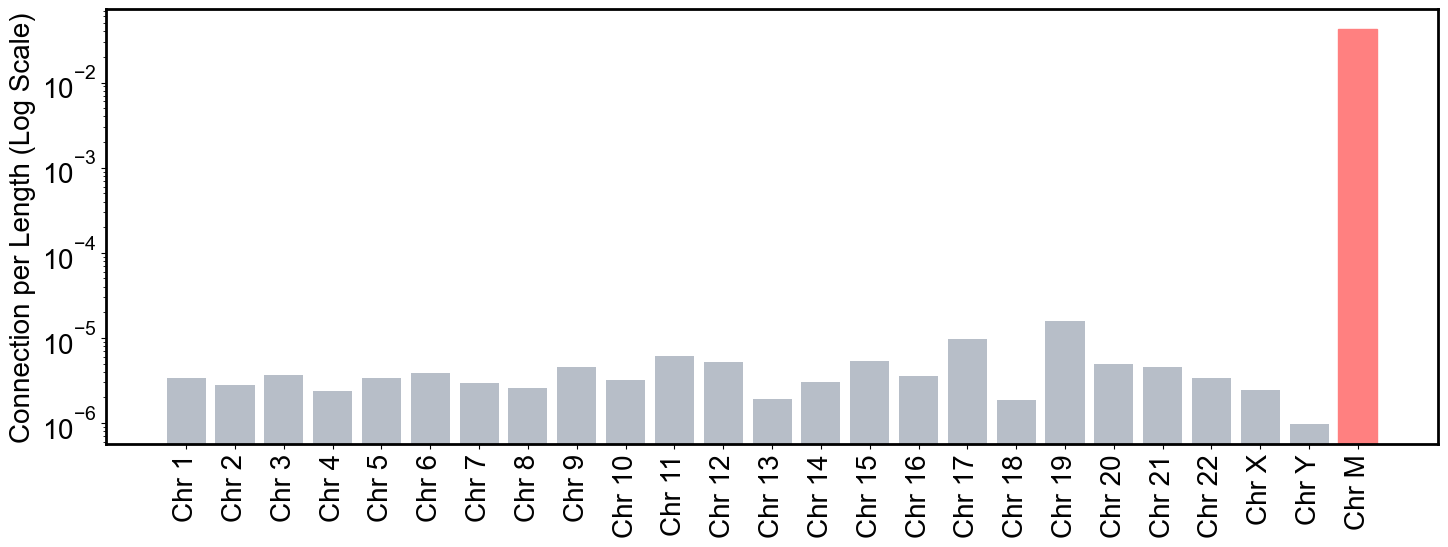

In [213]:
raw_analysis(
    total_chrom_connection_per_chrom_by_chrom_length,
    file_name="total_chrom_connection_per_chrom_by_chrom_length_raw_data_vcap004.pdf",
)

In [89]:
# min_max_scale(total_chrom_connection_per_chrom_by_chrom_length).plot(kind="bar")

In [90]:
total_chrom_connection_per_chrom_by_chrom_length_zscore = (
    total_chrom_connection_per_chrom_by_chrom_length
    - total_chrom_connection_per_chrom_by_chrom_length.mean()
) / total_chrom_connection_per_chrom_by_chrom_length.std()

In [91]:
total_chrom_connection_per_chrom_by_chrom_length_zscore

chr1    -0.200138
chr2    -0.200318
chr3    -0.200134
chr4    -0.200463
chr5    -0.200299
chr6    -0.200072
chr7    -0.200329
chr8    -0.200202
chr9    -0.200042
chr10   -0.200273
chr11   -0.199397
chr12   -0.199630
chr13   -0.200529
chr14   -0.200325
chr15   -0.199883
chr16   -0.200123
chr17   -0.198980
chr18   -0.200519
chr19   -0.197020
chr20   -0.200061
chr21   -0.200254
chr22   -0.199891
chrX    -0.200407
chrY    -0.200711
chrM     4.799999
dtype: float64

<Axes: >

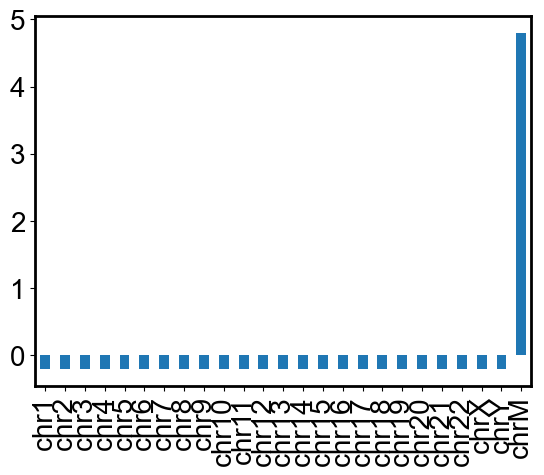

In [47]:
total_chrom_connection_per_chrom_by_chrom_length_zscore.plot(kind="bar")

In [98]:
def sig_analysis(data, file_name=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy import stats

    # Z-score normalization
    z_scores = (data - data.mean()) / data.std()

    # Sort the z-scores
    z_scores_sorted = z_scores

    # Calculate p-values
    p_values = pd.Series(
        {chr: stats.norm.sf(abs(z)) * 2 for chr, z in z_scores.items()}
    )

    # Bonferroni correction for multiple testing
    alpha = 0.05
    bonferroni_threshold = alpha / len(p_values)

    # Plot
    plt.figure(figsize=(15, 6))
    bars = plt.bar(z_scores_sorted.index, z_scores_sorted.values)

    # Color bars based on significance
    for i, (chr, p_value) in enumerate(p_values[z_scores_sorted.index].items()):
        if p_value < bonferroni_threshold:
            bars[i].set_color(g2)
        elif p_value < alpha:
            bars[i].set_color("orange")
        else:
            bars[i].set_color(g1)

    plt.axhline(y=0, color="k", linestyle="--")
    # plt.title('Z-scores of Chromosome Data with Statistical Significance')

    # plt.xlabel('Chromosome')
    plt.ylabel("Z-score")
    plt.xticks(
        range(len(z_scores_sorted)),
        [f"C{i[1:3]} {i[3:]}" for i in all_chrs[:-1]],
        rotation=90,
    )

    # Add text annotation for chrM
    chrM_index = list(z_scores_sorted.index).index("chrM")
    plt.annotate(
        f'chrM\np-value: {p_values["chrM"]:.2e}',
        xy=(chrM_index, z_scores_sorted["chrM"]),
        xytext=(chrM_index - 5, z_scores_sorted["chrM"] + 1),
        arrowprops=dict(facecolor="black", shrink=0.05),
    )

    # sns.despine(trim=False, left=False)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(
            f"{file_name}",
            dpi=300,
            facecolor="w",
            edgecolor="w",
            bbox_inches="tight",
        )

    # Print statistical summary
    print("\nStatistical Summary:")
    print(f"chrM Z-score: {z_scores['chrM']:.2f}")
    print(f"chrM p-value: {p_values['chrM']:.2e}")
    print(f"Bonferroni-corrected significance threshold: {bonferroni_threshold:.2e}")


Statistical Summary:
chrM Z-score: 4.80
chrM p-value: 1.59e-06
Bonferroni-corrected significance threshold: 2.00e-03


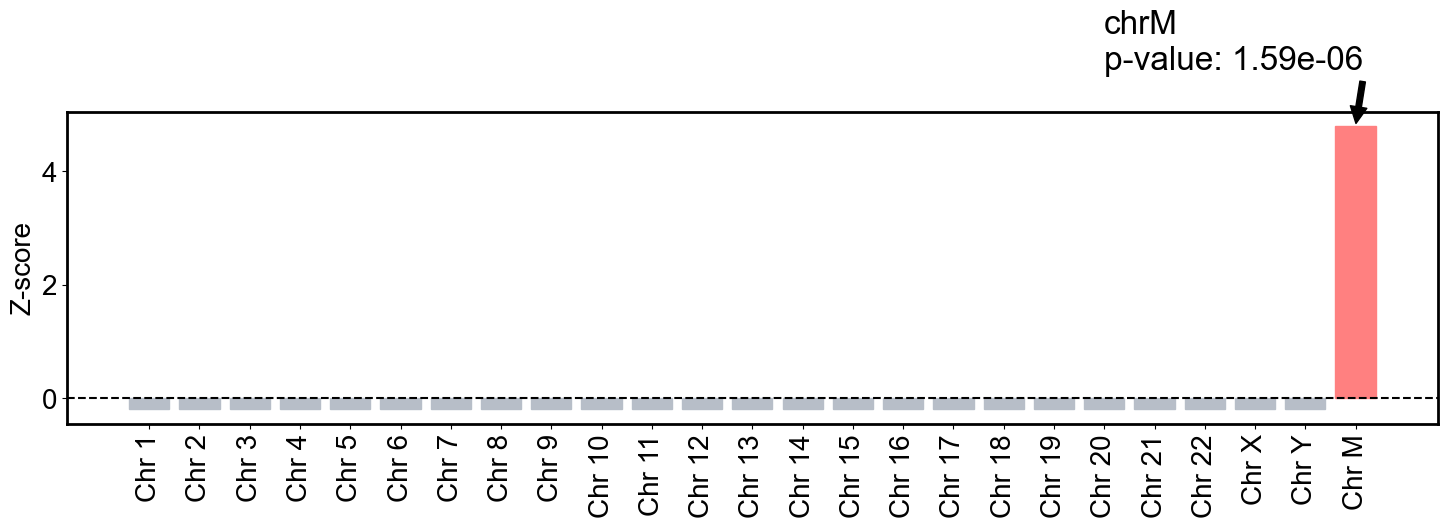

In [99]:
sig_analysis(
    total_chrom_connection_per_chrom_by_chrom_length,
    file_name="total_chrom_connection_per_chrom_by_chrom_length.pdf",
)

In [64]:
# all_chrs_labels = [f"Chr {i}" for i in range(1, 23)]  + ["Chr M", "Chr X", "Chr Y"]
all_chrs_labels = [f"{i}" for i in range(1, 23)] + ["M", "X", "Y"]

In [150]:
colors = [
    "#227980",
    "#688F69",
    "#D2DC38",
    "#F5B16E",
    "#F38F3C",
    "#CE9FCA",
    "#FAE93B",
    "#415C42",
    "#F7D1E3",
    "#734E9C",
    "#A9CCDE",
    "#707070",
    "#8BB8D6",
    "#F7BF6C",
    "#C0845C",
    "#61B673",
    "#F37F76",
    "#C3b0D2",
    "#D4242A",
    "#EE9094",
    "#BCD896",
    "#C6C2DF",
    "#0C0C0C",
    "#90D0C2",
    "#FFCFD1",
]

all_chrs_colors = {l: colors[ind] for ind, l in enumerate(all_chrs_labels)}

In [151]:
all_chrs_colors

{'1': '#227980',
 '2': '#688F69',
 '3': '#D2DC38',
 '4': '#F5B16E',
 '5': '#F38F3C',
 '6': '#CE9FCA',
 '7': '#FAE93B',
 '8': '#415C42',
 '9': '#F7D1E3',
 '10': '#734E9C',
 '11': '#A9CCDE',
 '12': '#707070',
 '13': '#8BB8D6',
 '14': '#F7BF6C',
 '15': '#C0845C',
 '16': '#61B673',
 '17': '#F37F76',
 '18': '#C3b0D2',
 '19': '#D4242A',
 '20': '#EE9094',
 '21': '#BCD896',
 '22': '#C6C2DF',
 'M': '#0C0C0C',
 'X': '#90D0C2',
 'Y': '#FFCFD1'}

In [152]:
len(colors)

25

In [153]:
# all_chrs_labels
selected_matrix = matrix_data.iloc[:25, :25]
selected_matrix.index = all_chrs_labels
selected_matrix.columns = all_chrs_labels

In [ ]:
from pycirclize import Circos

# Initialize from matrix (Can also directly load tsv matrix file)
circos = Circos.initialize_from_matrix(
    selected_matrix,
    space=1,
    r_lim=(93, 100),
    cmap=all_chrs_colors,
    label_kws=dict(size=16),
    link_kws=dict(ec="black", lw=0, direction=0, alpha=1, color="white"),
)

fig = circos.plotfig(
    dpi=300,
    # figsize=(10, 10)
)
plt.tight_layout()
fig.savefig("vcap002_sa_tag_summary_connection_chr.pdf", dpi=300)

# Supplemental Figures

## Relative Chop Position

In [136]:
import deepchopper

In [137]:
stats_json_path = "./data/stats_pd1000000_bt0_hy.json"
stats = deepchopper.StatResult.from_json(stats_json_path)

Type:        list
String form: ['f5a2c88f-2216-426c-8e97-1c7e9ba83d55', 'bc83a689-13ef-4961-8cc2-f79a37a6e33e', '00313cc1-4848-4 <...> fb-ba832eb766b8', 'a1a9f416-d58a-4621-b4bb-99946f9886ef', 'a7911279-60b6-494f-b4bd-513e3e253fed']
Length:      870761
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

Text(0.5, 0, 'Relative Position')

Text(0, 0.5, 'Density (log scale)')

([<matplotlib.axis.XTick at 0x350e72650>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

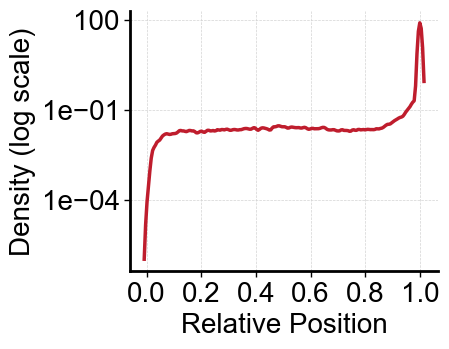

In [37]:
from matplotlib.ticker import LogFormatter

fig, ax = plt.subplots(figsize=(5, 4))
# fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot
kde = sns.kdeplot(stats.smooth_intervals_relative_pos, color=d1, linewidth=2.5)

# Set the y-axis to log scale
ax.set_yscale("log")
ax.yaxis.set_major_formatter(LogFormatter())

# Set the x-axis ticks
ax.set_xticks(np.arange(0, 1.1, 0.1))

# Set labels and title
ax.set_xlabel("Relative Position")
ax.set_ylabel("Density (log scale)")

# # Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# Set the tick parameters
ax.tick_params(axis="both", which="both", length=4, width=1, direction="out")

# Set the grid
ax.grid(color="lightgray", linestyle="--", linewidth=0.5)

plt.xticks(np.linspace(0, 1, 6))

# Adjust the plot layout
plt.tight_layout()

# Save the figure
plt.savefig("relative_chop_pos.pdf", dpi=300)

## Chopped Read Length Distribution

In [29]:
vcap_002_all_adapter_length = json.load(open("data/vcap_002_all_pd_length_distri.json"))

In [30]:
len(vcap_002_all_adapter_length)

8218172

In [40]:
max(vcap_002_all_adapter_length)

264

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Length of Predicted Artifacts')

Text(0, 0.5, 'Frequency')

([<matplotlib.axis.XTick at 0x3997804c0>,
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

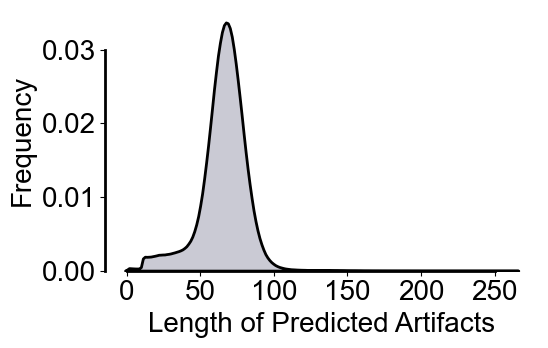

In [39]:
plt.figure(figsize=(6, 4))
sns.kdeplot(
    vcap_002_all_adapter_length, fill=True, color=e1, edgecolor="k", linewidth=2
)

# plt.xticks(range(0, max_x, 1))
plt.xlabel("Length of Predicted Artifacts")
plt.ylabel("Frequency")

plt.xticks(np.linspace(0, 250, 6))
sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig("length_of_predicted_artifacts_vcap_002_all_predicts.pdf", dpi=300)

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Density'>

Text(0.5, 0, 'Length of Predicted Artifacts')

Text(0, 0.5, 'Frequency')

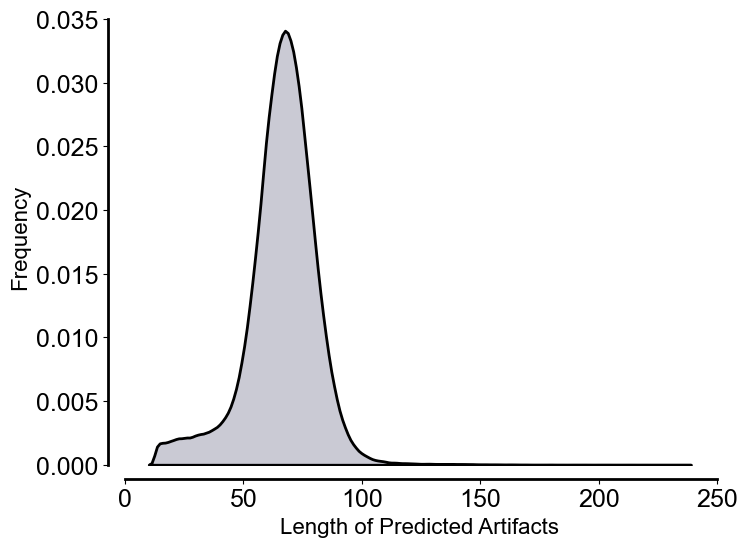

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    stats.lenghth_smooth_predicts_with_chop(),
    fill=True,
    color=e1,
    edgecolor="k",
    linewidth=2,
)

# plt.xticks(range(0, max_x, 1))
plt.xlabel("Length of Predicted Artifacts")
plt.ylabel("Frequency")

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("length_of_predicted_artifacts.pdf", dpi=300)

## Chopped Read Count for Read Distribution

<Figure size 800x600 with 0 Axes>

<Axes: ylabel='Count'>

Text(0.5, 0, 'The Number of Intervals Per Predict')

Text(0, 0.5, 'Count (Log Scale)')

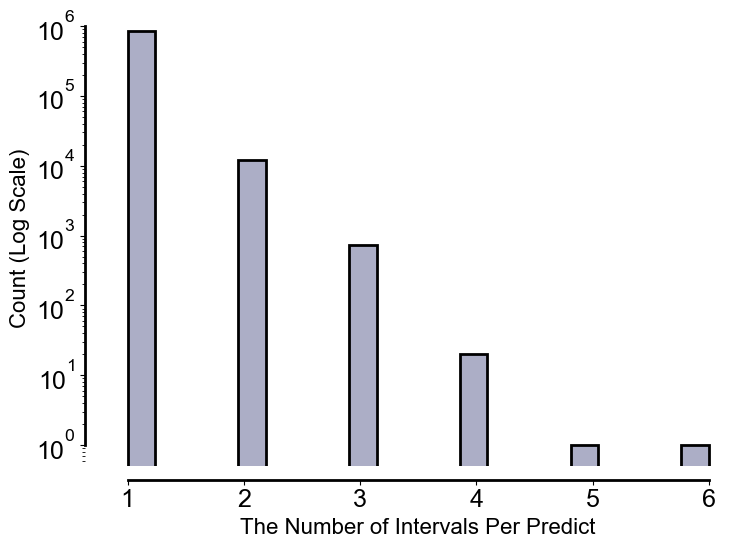

In [15]:
plt.figure(figsize=(8, 6))

sns.histplot(
    stats.number_smooth_predicts_with_chop(),
    kde=False,
    color=e2,
    edgecolor="k",
    linewidth=2,
)
# sns.kdeplot(stats.number_smooth_predicts_with_chop(), fill=True, color=e1, edgecolor="k", linewidth=2)

plt.yscale("log")
# plt.xticks(range(0, max_x, 1))

plt.xlabel("The Number of Intervals Per Predict")
plt.ylabel("Count (Log Scale)")

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig("count_of_predicted_artifacts_per_read.pdf", dpi=300)

## Terminal Adapter Base Quality and Blat Results

In [12]:
847421 / 1000000

0.847421

In [116]:
terminal_adapter_seq_qual = plot_qual(
    "data/vcap_002_hyena_bt0_terminal_adapter.1000000pd.1013638record.chop.fq.gz"
)

In [117]:
len(terminal_adapter_seq_qual)

847421

<Axes: ylabel='Density'>

Text(0.5, 0, 'Base Qual')

Text(0, 0.5, 'Density')

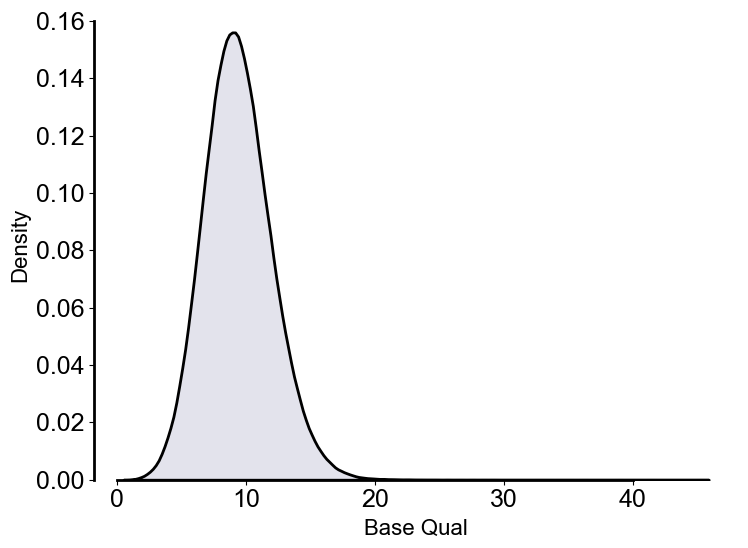

In [152]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=False)
sns.kdeplot(
    data=terminal_adapter_seq_qual, fill=True, color=e2, edgecolor="k", linewidth=2
)

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=0, trim=True)

axs.set_xlabel("Base Qual")
plt.ylabel("Density")

plt.tight_layout()

plt.savefig(
    "base_quals_for_terminal_adapter_vcap_bt0.pdf",
    bbox_inches="tight",
    dpi=300,
)

In [10]:
terminal_adapter_blat = json.load(open("data/terminal_adapter_blat.json"))

In [11]:
len(terminal_adapter_blat)

630474

<Axes: ylabel='Density'>

Text(0.5, 0, 'BLAT Indentity')

Text(0, 0.5, 'Density')

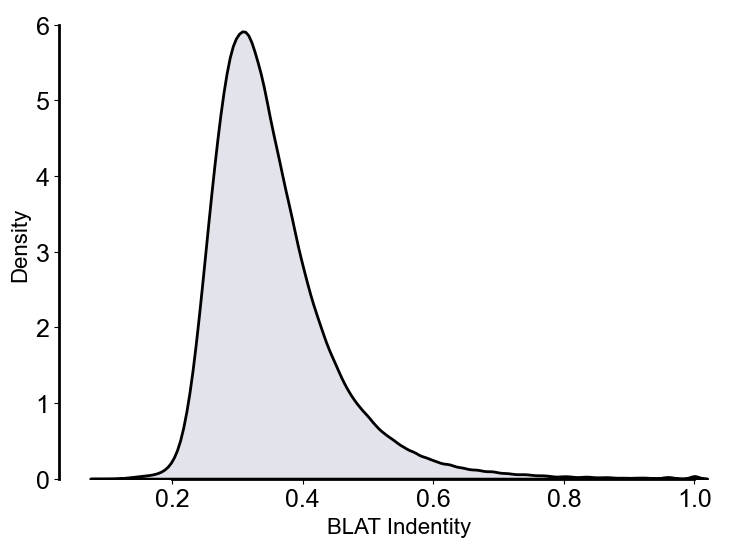

In [154]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=False)
sns.kdeplot(data=terminal_adapter_blat, fill=True, color=e2, edgecolor="k", linewidth=2)

# left_bar = mpatches.Patch(color=e2, label="Removed Sequence")
# right_bar = mpatches.Patch(color=e3, label="Retained Sequence")
# axs[1].legend(handles=[left_bar, right_bar], loc="best")

sns.despine(offset=0, trim=True)
axs.set_xlabel("BLAT Indentity")
plt.ylabel("Density")

plt.tight_layout()

plt.savefig(
    "blat_indentity_for_terminal_adapter_vcap_bt0.pdf",
    bbox_inches="tight",
    dpi=300,
)

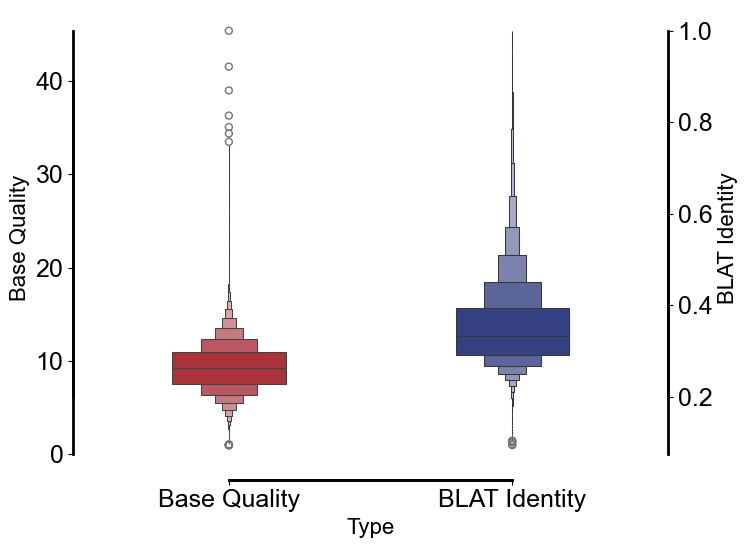

In [119]:
plot_box_for_base_qual_and_blat(
    terminal_adapter_seq_qual,
    terminal_adapter_blat,
    plot_type="boxenplot",
    figname="vcap002_terminal_base_qual_and_blat_box_plot.pdf",
)

## Terminal Adapter Chop Compared with SoftClipping of Bam

In [10]:
def vis_overlap_results(data, figsize=(9, 6), log=False, context="notebook"):
    import pandas as pd

    internal_acc, terminal_acc, total_acc = get_acc(data)

    sorted_keys = [
        "sc_without_chop",
        "terminal_chop_sc",
        "internal_chop_sc",
        "internal_chop_sc_sa",
        "terminal_chop_nosc",
        "terminal_chop_nosc_noblat",
        "terminal_chop_nosc_cannot_blat",
        "internal_chop_nosc",
        "internal_chop_nosc_noblat",
        "internal_chop_nosc_cannot_blat",
        "no_process",
        "unmapped_read",
    ]

    plot_df = pd.DataFrame(
        [(key, len(data.get(key, []))) for key in sorted_keys],
        columns=["Category", "Count"],
    )

    # sns.set_context(context)

    # Plotting the data
    plt.figure(figsize=figsize)  # Set the figure size
    ax = sns.barplot(x=plot_df["Category"], y=plot_df["Count"])
    ax.bar_label(ax.containers[0], fontsize=10)
    sns.despine()
    plt.xlabel("Category")  # Set the x-label
    plt.ylabel("Number of Items")  # Set the y-label
    plt.title(
        f"Count of Items in Each Category {internal_acc=:.4f} {terminal_acc=:.4f} {total_acc=:.4f}"
    )  # Set the title
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to make room for the rotated x-labels

    plt.show()  # Display the plot
    plt.close()
    return internal_acc, terminal_acc, total_acc


In [ ]:
overlap_result_path = "./data/"
overlap_results = json.load(open(overlap_result_path))

In [16]:
pie_data = {
    "SC": 603299,
    "NOSC": 2144,
    "NoBLAT": 2075,
}

In [20]:
603299 / (603299 + 2144)

0.9964587913313062

In [22]:
(2075) / 2114

0.9815515610217597

[Text(0, 0, '3%')]

[Text(0, 0, '97%')]

(-0.11000000000000001, 0.11000000000000001, 0.0, 1.05)

(-0.5, 0.5)

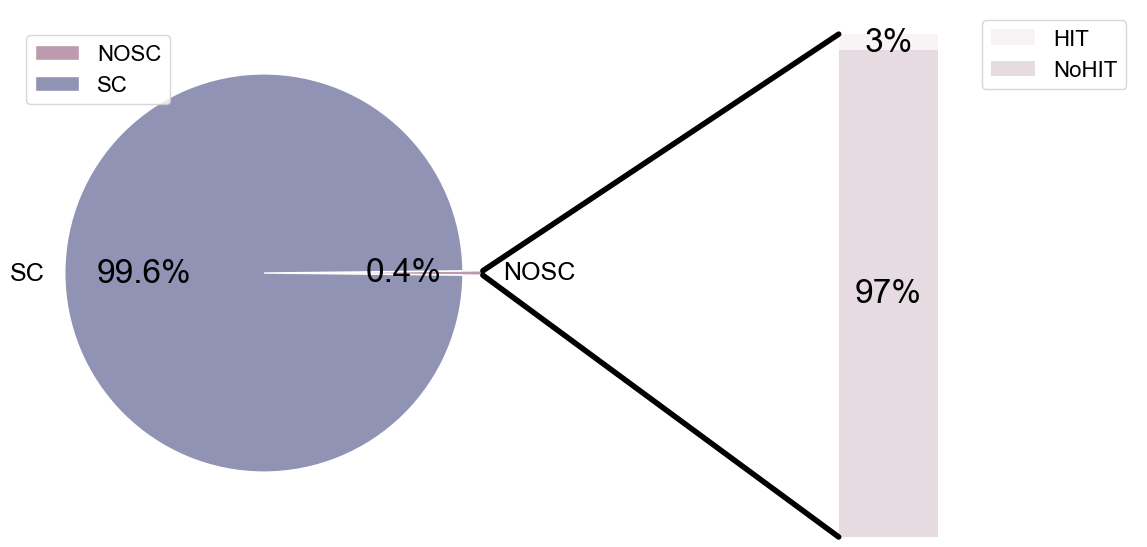

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [
    pie_data["NOSC"] / sum(pie_data.values()),
    pie_data["SC"] / sum(pie_data.values()),
]
labels = ["NOSC", "SC"]
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(
    overall_ratios,
    autopct="%1.1f%%",
    startangle=angle,
    labels=labels,
    explode=explode,
    colors=[e3, e2],
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)

# bar chart parameters
age_ratios = [
    pie_data["NoBLAT"] / pie_data["NOSC"],
    (pie_data["NOSC"] - pie_data["NoBLAT"]) / pie_data["NOSC"],
]
age_labels = ["NoHIT", "HIT"]
bottom = 1
width = 0.2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(
        0, height, width, bottom=bottom, color=e3, label=label, alpha=0.1 + 0.25 * j
    )
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type="center")

# ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis("off")
ax2.set_xlim(-2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, bar_height),
    coordsA=ax2.transData,
    xyB=(x, y),
    coordsB=ax1.transData,
)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, 0), coordsA=ax2.transData, xyB=(x, y), coordsB=ax1.transData
)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

# add a lengend for the pie chart
ax1.legend(
    wedges,
    labels,
    #    title="Chimeric Artifacts",
    loc="upper left",
)

plt.tight_layout()
plt.savefig("pie_bar_chart.pdf", dpi=300)

all adapter sequences:  8,218,172


1M subsampling: 

- sc_without_chop 21
- terminal chop: 603299 + 2114
- unmapped reads: 106954

Out[9]:
                          Category   Count
0                  sc_without_chop   21477
1                 terminal_chop_sc  603299
2                 internal_chop_sc    6107
3              internal_chop_sc_sa    3326
4               terminal_chop_nosc    2114
5        terminal_chop_nosc_noblat    2075
6   terminal_chop_nosc_cannot_blat      32
7               internal_chop_nosc     843
8        internal_chop_nosc_noblat     454
9   internal_chop_nosc_cannot_blat     321
10                      no_process       0
11                   unmapped_read  106954

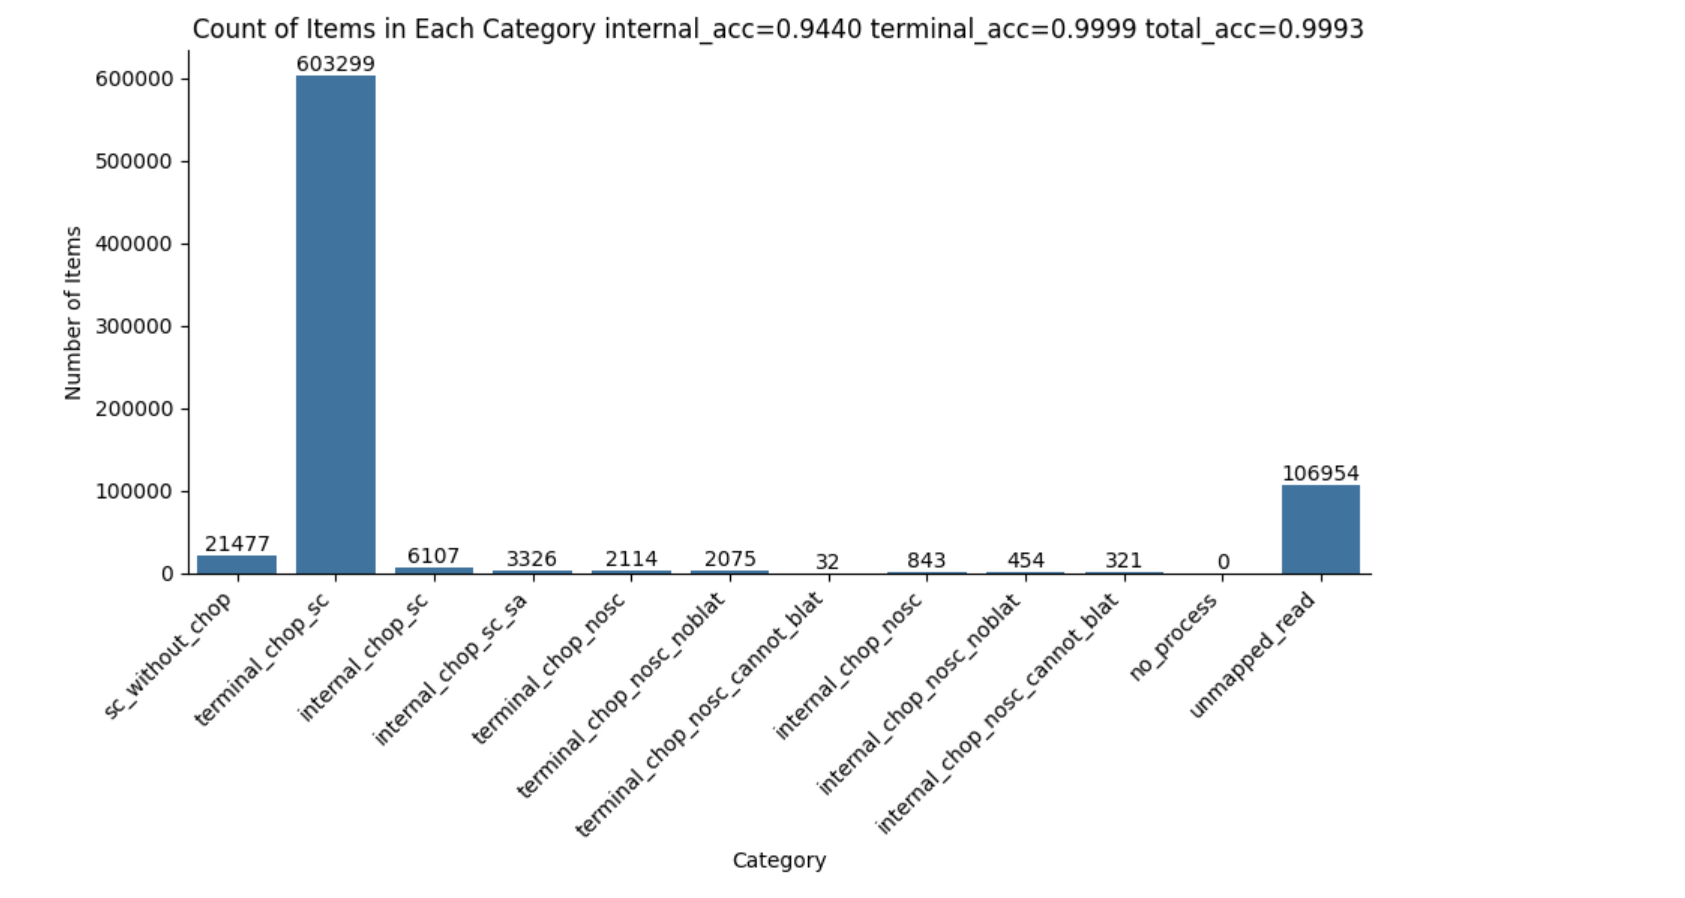

## Comparison for Adapter detection tools


In [148]:
# Pychopper recall: .0205
# Pychopper precision: 0.0022
# Pychopper F1: 0.0039

# Porechop recall: 0
# Porechop precision: 0
# Porechop F1: 0

# DeepChopper recall: 0.994
# DeepChopper precision: 0.992
# DeepChopper F1: 0.993

def draw_performance_for_adapter_detections(figsize=(10, 6), colors=[
        "#FF9999",
        "#66B3FF",
        "#99FF99"],
        linewidth=1,
        figname="adapter_detection_performance.pdf"):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    # Data for the bar chart
    tools = ["Pychopper", "Porechop", "Porechop_ABI", "DeepChopper"]
    recall = [0.0205, 0, 0.001, 0.994]
    precision = [0.0022, 0, 0, 0.992]
    f1 = [0.0039, 0, 0, 0.993]

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Set the width of the bars and positions
    bar_width = 0.25
    x = np.arange(len(tools))


    # Create the bars
    bars1 = ax.bar(
        x - bar_width,
        recall,
        bar_width,
        label="Recall",
        color=colors[0],
        edgecolor="black",
        linewidth=linewidth,
    )
    bars2 = ax.bar(
        x,
        precision,
        bar_width,
        label="Precision",
        color=colors[1],
        edgecolor="black",
        linewidth=linewidth,
    )
    bars3 = ax.bar(
        x + bar_width,
        f1,
        bar_width,
        label="F1 Score",
        color=colors[2],
        edgecolor="black",
        linewidth=linewidth,
    )

    # Add labels, title, and legend
    # ax.set_xlabel('Tools', fontsize=12)
    ax.set_ylabel("Value")
    # ax.set_title('Performance Comparison of Adapter Detection Tools', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(tools)
    ax.set_ylim(0, 1.1)
    sns.despine(trim=False)
    ax.legend()

    # Add value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(
                f"{height:.3f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center",
                va="bottom",
                fontsize=14,
            )


    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)

    plt.tight_layout()
    if figname is not None:
        print(f"Saving figure to {figname}")
        plt.savefig(f"{figname}", dpi=300)

Saving figure to adapter_detection_performance.pdf


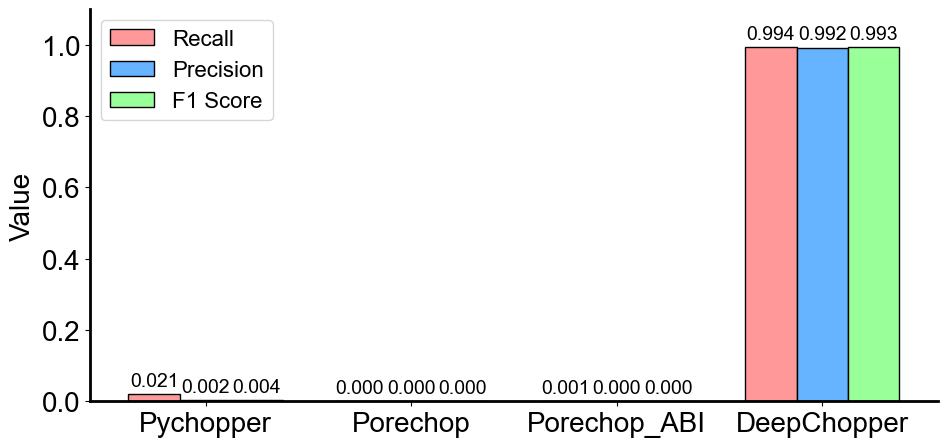

In [149]:
draw_performance_for_adapter_detections(figsize=(10,5))

## Distribution of probability for each token in testing dataset (600,000)


In [100]:
from pathlib import Path
import torch

predictions_folder = Path("../rebutt/predicts/0")

In [101]:
# read pt from predictions
predictions = list(predictions_folder.glob("*.pt"))

In [102]:
predictions[:10]

[PosixPath('../rebutt/predicts/0/1_3978.pt'),
 PosixPath('../rebutt/predicts/0/0_1848.pt'),
 PosixPath('../rebutt/predicts/0/0_961.pt'),
 PosixPath('../rebutt/predicts/0/0_2522.pt'),
 PosixPath('../rebutt/predicts/0/1_2686.pt'),
 PosixPath('../rebutt/predicts/0/1_2517.pt'),
 PosixPath('../rebutt/predicts/0/1_2985.pt'),
 PosixPath('../rebutt/predicts/0/1_979.pt'),
 PosixPath('../rebutt/predicts/0/0_662.pt'),
 PosixPath('../rebutt/predicts/0/0_722.pt')]

In [114]:
def draw_adapter_predict_distribution(predictions, figsize=(15, 6),  figname=None):
    import torch.nn.functional as F
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Initialize arrays to collect probabilities from all predictions
    all_prob_class1_gt1 = []  # Probabilities of class 1 where ground truth is 1
    all_prob_class0_gt1 = []  # Probabilities of class 0 where ground truth is 1
    all_prob_class1_gt0 = []  # Probabilities of class 1 where ground truth is 0
    all_prob_class0_gt0 = []  # Probabilities of class 0 where ground truth is 0
    
    # Process all prediction files
    for pred_file in predictions:
        try:
            # Load the prediction data
            pt = torch.load(pred_file)
            
            # Apply softmax to get probabilities
            logits = pt["prediction"]  # Shape: [batch_size, seq_len, 2]
            probs = F.softmax(logits, dim=2)  # Apply softmax along the class dimension
            
            # Get the target labels
            targets = pt["target"]  # Shape: [batch_size, seq_len]
            
            # For ground truth label 1 (adapters)
            mask_1 = targets == 1
            if mask_1.sum() > 0:
                probs_class1 = probs[mask_1]  # Get probabilities where target is 1
                # Extract probabilities for class 0 and 1
                prob_class0 = probs_class1[:, 0].cpu().numpy()
                prob_class1 = probs_class1[:, 1].cpu().numpy()
                
                all_prob_class1_gt1.extend(prob_class1)
                all_prob_class0_gt1.extend(prob_class0)
            
            # For ground truth label 0 (non-adapters)
            mask_0 = targets == 0
            if mask_0.sum() > 0:
                probs_class0 = probs[mask_0]  # Get probabilities where target is 0
                # Extract probabilities for class 0 and 1
                prob_class0 = probs_class0[:, 0].cpu().numpy()
                prob_class1 = probs_class0[:, 1].cpu().numpy()
                
                all_prob_class1_gt0.extend(prob_class1)
                all_prob_class0_gt0.extend(prob_class0)
        except Exception as e:
            print(f"Error processing {pred_file}: {e}")
    
    # Convert lists to numpy arrays
    all_prob_class1_gt1 = np.array(all_prob_class1_gt1)
    all_prob_class0_gt1 = np.array(all_prob_class0_gt1)
    all_prob_class1_gt0 = np.array(all_prob_class1_gt0)
    all_prob_class0_gt0 = np.array(all_prob_class0_gt0)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Plot density distribution for ground truth label 1
    if len(all_prob_class1_gt1) > 0:
        sns.kdeplot(
            all_prob_class1_gt1,
            ax=ax1,
            label="Prob of Adapter",
            fill=True,
            alpha=0.5,
            color="orange",
        )
        sns.kdeplot(
            all_prob_class0_gt1,
            ax=ax1,
            label="Prob of Non-Adapter",
            fill=True,
            alpha=0.5,
            color="blue",
        )
        ax1.set_title("Ground Truth: Adapter")
        ax1.set_xlabel("Probability")
        ax1.set_ylabel("Density")
        ax1.legend()
    
    # Plot density distribution for ground truth label 0
    if len(all_prob_class1_gt0) > 0:
        sns.kdeplot(
            all_prob_class1_gt0,
            ax=ax2,
            label="Prob of Adapter",
            fill=True,
            alpha=0.5,
            color="orange",
        )
        sns.kdeplot(
            all_prob_class0_gt0,
            ax=ax2,
            label="Prob of Non-Adapter",
            fill=True,
            alpha=0.5,
            color="blue",
        )
        ax2.set_title("Ground Truth: Non-Adapter")
        ax2.set_xlabel("Probability")
        ax2.set_ylabel("Density")
        ax2.legend()
    
    sns.despine()
    plt.tight_layout()
    
    if figname is not None:
        print(f"Saving figure to {figname}")
        plt.savefig(figname, dpi=300)
    
    # Calculate overall statistics
    total_samples = len(all_prob_class1_gt1) + len(all_prob_class1_gt0)
    print(f"Total samples processed: {total_samples}")
    
    # Calculate accuracy
    correct_gt1 = np.sum(all_prob_class1_gt1 > 0.5)
    correct_gt0 = np.sum(all_prob_class0_gt0 > 0.5)
    total_correct = correct_gt1 + correct_gt0
    accuracy = total_correct / total_samples if total_samples > 0 else 0
    print(f"Overall accuracy: {accuracy:.4f}")

Saving figure to probability_distribution_of_adapter_prediction.pdf
Total samples processed: 94085022
Overall accuracy: 0.9994


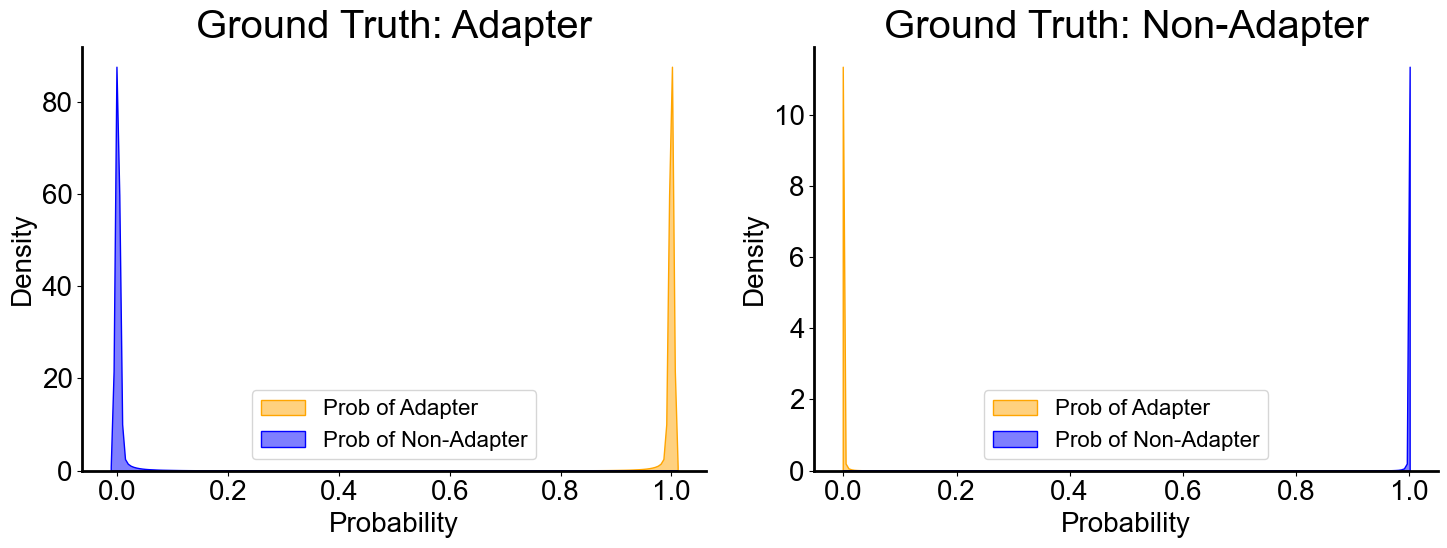

In [115]:
draw_adapter_predict_distribution(predictions, figname="probability_distribution_of_adapter_prediction.pdf")

## Runtime Figure


In [133]:
runtime_data = {
    "time": {
        "0.1M": {
            "FASTQ Conversion": [17.370524149, 17.280167030, 17.279187744],  # Seconds
            "Prediction": [178.504326232, 183.01453213, 188.872447542],  # Seconds
            "Post-Processing": [176.546902179, 186.399731959, 176.546902179],  # Seconds
        },
        "0.5M": {
            "FASTQ Conversion": [53.618648521, 51.308494673, 49.840517968],  # Seconds
            "Prediction": [879.0017053, 824.360188207, 827.238925174],  # Seconds
            "Post-Processing": [768.676961362, 745.784783469, 766.546359542],  # Seconds
        },
        "1M": {
            "FASTQ Conversion": [
                89.020873510,
                88.306931018,
                97.612357264,
            ],  # Seconds
            "Prediction": [1606.589303078, 1600.313285826, 1601],  # Seconds
            "Post-Processing": [
                1411.465307462,
                1440.895273626,
                1357.081309284,
            ],  # Seconds
        },
        "Full": {
            "FASTQ Conversion": [
                24 * 60,
                25 * 60,
                26 * 60,
            ],  # Seconds
            "Prediction": [
                3 * 60 * 60 + 45 * 60,
                3 * 60 * 60 + 41 * 60,
                3 * 60 * 60 + 40 * 60,
            ],  # Seconds
            "Post-Processing": [
                51 * 60,
                58 * 60,
                56 * 60,
            ],  # Seconds
        },
    },
    "mem": {
        "0.1M": {
            "FASTQ Conversion": [
                3.28,
                3.28,
                3.28,
            ],  # Gigabytes
            "Prediction": [
                (39.61, 72.21 / 2),
                (40.23, 72.08 / 2),
                (40.15, 72.09 / 2),
            ],  #  if item is a tuple it means peak mem for (cpu, gpu)
            "Post-Processing": [22.29, 22.29, 22.29],
        },
    },
    "0.5M": {
        "FASTQ Conversion": [10.09, 10.10, 10.19],  # Gigabytes
        "Prediction": [
            (55.12, 68.70 / 2),
            (54.82, 68.70 / 2),
            (53.49, 68.70 / 2),
        ],  #  if item is a tuple it means peak mem for (cpu, gpu)
        "Post-Processing": [23.24, 23.24, 23.24],
    },
    "1M": {
        "FASTQ Conversion": [19.53, 19.50, 19.60],  # Gigabytes
        "Prediction": [
            (70.78, 44.00 / 2),
            (69.70, 44.00 / 2),
            (70.70, 44.00 / 2),
        ],  #  if item is a tuple it means peak mem for (cpu, gpu)
        "Post-Processing": [24.41, 24.47, 24.41],
    },
    "Full": {
        "FASTQ Conversion": [39, 40, 41],  # Gigabytes
        "Prediction": [
            (69.80, 89.67 / 2),
            (71.5, 89 / 2),
            (71, 89/2),
        ],  #  if item is a tuple it means peak mem for (cpu, gpu)
        "Post-Processing": [40, 41, 42],
    },
}

# runtime: 15100.534759313 s
# peak_cpu: 4794.75G
# peak_mem: 69.80G
# peak_gpu: 182%
# peak_gpu_mem: 89.67G

In [134]:
def draw_runtime(
    data,
    figsize=(15, 6),
    data_size=["0.1M", "0.5M", "1M", "Full"],
    colors={
        "FASTQ Conversion": "#FF9999",
        "Prediction": "#66B3FF",
        "Post-Processing": "#99FF99",
        "Total": "#FFCC99",
    },
    figname=None,
):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns

    # Extract time data
    time_data = []
    for size, stages in data["time"].items():
        for stage, times in stages.items():
            for t in times:
                time_data.append(
                    {
                        "Size": size,
                        "Stage": stage,
                        "Time (h)": t / 3600,  # Convert seconds to hours
                    }
                )

    # Calculate total time for each size and repetition
    for size in data["time"].keys():
        for i in range(len(data["time"][size]["FASTQ Conversion"])):
            total_time = (
                data["time"][size]["FASTQ Conversion"][i]
                + data["time"][size]["Prediction"][i]
                + data["time"][size]["Post-Processing"][i]
            )
            time_data.append(
                {
                    "Size": size,
                    "Stage": "Total",
                    "Time (h)": total_time / 3600,  # Convert seconds to hours
                }
            )

    # Convert to DataFrame
    time_df = pd.DataFrame(time_data)

    # Extract memory data
    mem_data = []
    for size_key in data_size:
        size_data = data["mem"][size_key] if size_key == "0.1M" else data[size_key]
        for stage, mems in size_data.items():
            for m in mems:
                if isinstance(m, tuple):
                    # CPU memory
                    mem_data.append(
                        {
                            "Size": size_key,
                            "Stage": stage,
                            "Memory Type": "CPU",
                            "Memory (GB)": m[0],
                        }
                    )
                    # GPU memory
                    mem_data.append(
                        {
                            "Size": size_key,
                            "Stage": stage,
                            "Memory Type": "GPU",
                            "Memory (GB)": m[1],
                        }
                    )
                else:
                    # CPU memory only
                    mem_data.append(
                        {
                            "Size": size_key,
                            "Stage": stage,
                            "Memory Type": "CPU",
                            "Memory (GB)": m,
                        }
                    )

    # Convert to DataFrame
    mem_df = pd.DataFrame(mem_data)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot time data as bar chart
    # Group by Size and Stage to calculate mean and std
    time_stats = (
        time_df.groupby(["Size", "Stage"])["Time (h)"]
        .agg(["mean", "std"])
        .reset_index()
    )
    # Replace NaN std values with 0
    time_stats["std"] = time_stats["std"].fillna(0)

    # Set width of bars
    bar_width = 0.15
    index = np.arange(len(time_df["Size"].unique()))

    # Plot bars for each stage
    stages = ["FASTQ Conversion", "Prediction", "Post-Processing", "Total"]
    for i, stage in enumerate(stages):
        stage_time_data = time_stats[time_stats["Stage"] == stage]
        if not stage_time_data.empty:
            means = [
                stage_time_data[stage_time_data["Size"] == size]["mean"].values[0]
                for size in data_size
            ]
            stds = [
                stage_time_data[stage_time_data["Size"] == size]["std"].values[0]
                for size in data_size
            ]
            bars = ax1.bar(
                index + i * bar_width,
                means,
                bar_width,
                label=stage,
                color=colors[stage],
            )

            # Add error bars
            ax1.errorbar(
                index + i * bar_width,
                means,
                yerr=stds,
                fmt="none",
                ecolor="black",
                capsize=3,
            )

            # Add black outline to bars
            for bar in bars:
                bar.set_edgecolor("black")
                bar.set_linewidth(1)

    ax1.set_xlabel("Data Size")
    ax1.set_ylabel("Time (hours)")
    ax1.set_xticks(index + bar_width * 1.5)
    ax1.set_xticklabels(data_size)
    ax1.legend()

    # Plot memory data as bar chart
    # Group by Size, Stage, and Memory Type to calculate mean and std
    mem_stats = (
        mem_df.groupby(["Size", "Stage", "Memory Type"])["Memory (GB)"]
        .agg(["mean", "std"])
        .reset_index()
    )
    # Replace NaN std values with 0
    mem_stats["std"] = mem_stats["std"].fillna(0)

    # Set width of bars
    bar_width = 0.15
    index = np.arange(len(mem_df["Size"].unique()))

    # Plot bars for each stage and memory type
    # Reorder the stages to group them by type rather than stage
    mem_types = mem_df["Memory Type"].unique()
    stage_order = []
    for mem_type in mem_types:
        for stage in ["FASTQ Conversion", "Prediction", "Post-Processing"]:
            stage_order.append((stage, mem_type))

    for i, (stage, mem_type) in enumerate(stage_order):
        stage_mem_data = mem_stats[
            (mem_stats["Stage"] == stage) & (mem_stats["Memory Type"] == mem_type)
        ]
        if not stage_mem_data.empty:
            means = [
                stage_mem_data[stage_mem_data["Size"] == size]["mean"].values[0]
                if not stage_mem_data[stage_mem_data["Size"] == size].empty
                else 0
                for size in data_size
            ]
            stds = [
                stage_mem_data[stage_mem_data["Size"] == size]["std"].values[0]
                if not stage_mem_data[stage_mem_data["Size"] == size].empty
                else 0
                for size in data_size
            ]

            # Use the preset color for the stage, but make it lighter for GPU
            color = colors[stage]
            if mem_type == "GPU":
                # Create a lighter version of the color for GPU
                rgb = plt.cm.colors.to_rgb(color)
                color = plt.cm.colors.to_hex(
                    [c + (1 - c) * 0.5 for c in rgb]
                )  # Make it 50% lighter

            bars = ax2.bar(
                index + i * bar_width,
                means,
                bar_width,
                label=f"{stage} ({mem_type})",
                color=color,
            )

            # Add error bars
            ax2.errorbar(
                index + i * bar_width,
                means,
                yerr=stds,
                fmt="none",
                ecolor="black",
                capsize=3,
            )

            # Add black outline to bars
            for bar in bars:
                bar.set_edgecolor("black")
                bar.set_linewidth(1)

    ax2.set_xlabel("Data Size")
    ax2.set_ylabel("Memory (GB)")
    ax2.set_xticks(index + bar_width * (len(stage_order) - 1) / 2)
    ax2.set_xticklabels(data_size)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    sns.despine(trim=False)

    # Adjust layout

    plt.tight_layout()

    if figname:
        plt.savefig(figname, dpi=300)

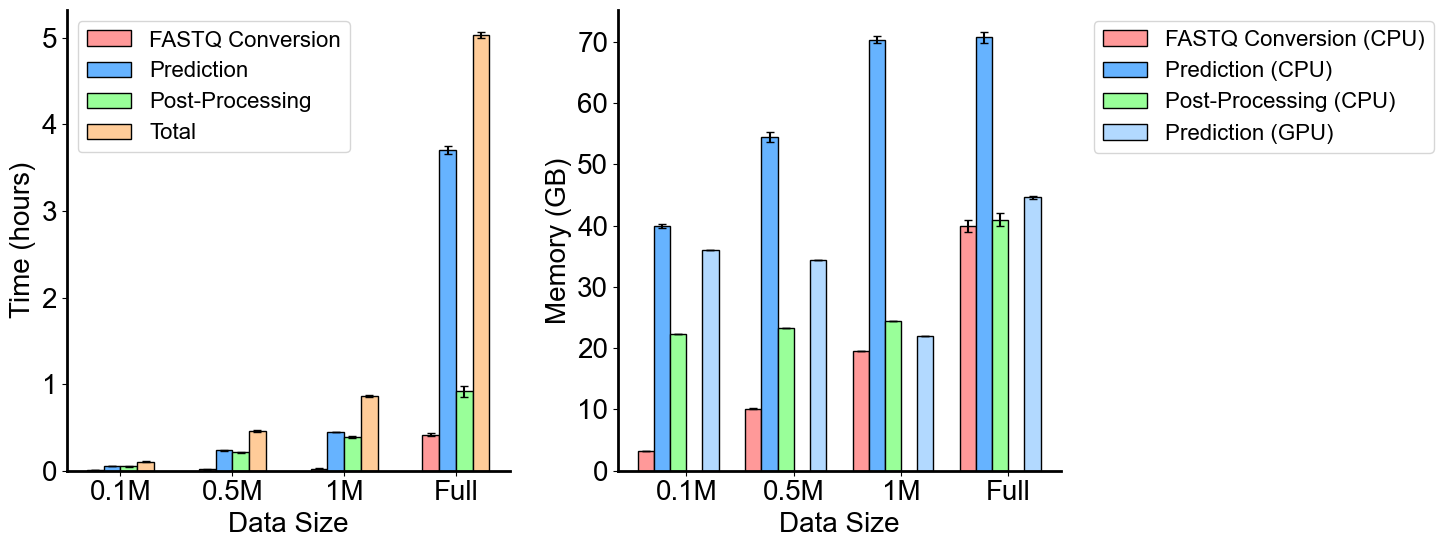

In [135]:
draw_runtime(runtime_data, figname="runtime_and_memory_usage.pdf")

## Slide Windows

In [107]:
# check the length of the prediction
# check the number of segments after trimming
# consider 11, 21, 41

In [143]:
# {'64aac837-5774-4f63-9917-1217901b2cca': [(493, 584)],
#  'd7711ea1-8a78-4091-a61f-451059ee4d77': [(1444, 1486)],
#  'bd40d2e8-5a16-41ba-89e1-eaab6fd336b0': [(437, 510)],
#  'd3e1a355-3cc9-4e4b-b58a-2389df159881': [(635, 660)],
#  '1d276281-43d6-4ed3-8892-6b90c90ea727': [(2364, 2418)],
#  '0b9e7204-671a-4690-8aac-2a522dbbc765': [(1024, 1096)],
# }
# the data will be {
# "11":[5, 10],
# "21":[10, 20],
# "41":[20, 30]
# }
# the key is window size, the value is a list of lengths


def draw_adapter_length(
    data,
    figsize=(15, 6),
    figname=None,
):
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns
    import numpy as np

    # Create a DataFrame with window sizes and their corresponding lengths
    window_sizes = []
    lengths = []

    for window_size, length_list in data.items():
        for length in length_list:
            window_sizes.append(window_size)
            lengths.append(length)

    df = pd.DataFrame({"Window Size": window_sizes, "Length": lengths})

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot density curves for each window size
    for window_size in data.keys():
        subset = df[df["Window Size"] == window_size]
        sns.kdeplot(
            data=subset,
            x="Length",
            label=f"Window Size {window_size}",
            fill=True,
            alpha=0.4,
            ax=ax,
        )

    # Calculate and display statistics
    for i, window_size in enumerate(data.keys()):
        lengths_array = np.array(data[window_size])
        mean_length = np.mean(lengths_array)
        median_length = np.median(lengths_array)

        # Add vertical lines for means
        ax.axvline(
            x=mean_length,
            color=plt.cm.viridis(i / len(data)),
            linestyle="--",
            alpha=0.7,
            label=f"Mean (Size {window_size}): {mean_length:.1f}",
        )

    # Add labels and title
    ax.set_xlabel("Length", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_title("Adapter Length Distribution by Window Size", fontsize=14)

    # Add legend
    ax.legend(loc="best")

    sns.despine()

    # Show the plot
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname, dpi=300)

In [ ]:
def draw_number_of_prediction(data):
    """Draw a bar plot showing the frequency of each value in the data."""
    from collections import Counter
    
    # Count occurrences of each value
    counts = Counter(data)
    
    # Create figure with optimized size
    plt.figure(figsize=(5, 4))
    
    # Create bar plot directly from Counter object
    # Convert to DataFrame for better performance with larger datasets
    df = pd.DataFrame({'value': list(counts.keys()), 'count': list(counts.values())})
    
    # Convert string values to numeric if they're all parsable as numbers
    # This prevents the categorical units warning
    try:
        df['value'] = pd.to_numeric(df['value'])
    except (ValueError, TypeError):
        # If conversion fails, keep as is (might be mixed types or non-numeric strings)
        pass
    
    sns.barplot(x='value', y='count', data=df, edgecolor="k")
    
    # Clean up plot appearance
    sns.despine(offset=0, trim=True)
    plt.tight_layout()


In [144]:
# window 11 
# Counter({1: 854985, 2: 14471, 3: 1176, 4: 56, 5: 5, 6: 1, 7: 1})
print(854985 + 14471)

# window 21
# Counter({1: 857896, 2: 12108, 3: 735, 4: 20})
print(857896 + 12108)

# window 41
# Counter({1: 851993, 2: 8686, 3: 132, 4: 1})
print(851993 + 8686)

869456
870004
860679
